# SpeedWatch: Predictive Analysis of Speeding Incidences by Vehicle Type, Location, and Time
Authors:Morgan Mohan, David Moroney, Ashley Nilson, Anita Pathak <br>


#Executive Summary

Portland's roadways are grappling with a significant challenge: an uptick in speeding incidents despite the efforts of the Portland Transportation Department to enforce speed limit regulations. These incidents present a clear threat to road safety, resulting in accidents, injuries, and even fatalities. To tackle this pressing issue, our project undertook a comprehensive analysis of data sourced from the Portland Transportation Department, focusing on speed, volume, and classes of vehicles.

Our methodology encompassed several key stages. Initially, we merged datasets related to speed, traffic volume, and vehicle classes. Through extensive exploratory data analysis, we sought to understand the distribution of speed, traffic behavior by day, disparities between posted speed limits and actual speeds, and historical trends in overspeeding. Feature selection was then carried out to identify relevant variables for modeling and an initial Decision Tree model was used to further reduce predictor varaibles. Subsequently, we implemented Logistic Regression, K-Nearest Neighbors, and a Stacked Ensemble model to predict speeding incidents.

Our analysis yielded critical insights into the nature and extent of speeding incidents on Portland's roadways. We identified the top locations where vehicles consistently exceeded posted speed limits and observed fluctuations in overspeeding trends over the years. Notably, certain areas such as SE Division St E of SE 33rd Ave ranked highest for mean speed exceeding limits, indicating areas of particular concern.

Moreover, we identified key predictors for speeding behaviors, including traffic volume and time of day. Predictive modeling using Decision Tree Classifier and Logistic Regression demonstrated strong performance metrics, with the logistic regression model achieving an accuracy of 0.802 and a recall of 1 for both training and testing datasets.

These findings have significant implications for improving road safety and transportation management in Portland. By pinpointing areas with high instances of speeding and understanding the factors driving these behaviors, transportation authorities can implement targeted interventions to mitigate risks and enhance road safety. Possible interventions include deploying speed enforcement measures such as speed cameras or increased police patrols in identified hotspot areas. Additionally, insights gleaned from predictive modeling can inform the development of proactive strategies to anticipate and address future challenges related to speeding incidents.

Our project underscores the importance of data-driven approaches in tackling speeding incidents and enhancing road safety. By leveraging comprehensive analysis of traffic data, stakeholders can make informed decisions to optimize transportation management and improve the quality of life for Portland residents. Moving forward, continued collaboration between transportation authorities, law enforcement agencies, and urban planners will be essential for the successful implementation of road safety initiatives.

## Introduction
Speeding incidents on Portland's roadways have become a prominent and persistent challenge, despite concerted efforts by the Portland Transportation Department to enforce speed limit regulations. These incidents not only pose a threat to public safety but also impede effective mitigation measures. In response to this ongoing issue, our project endeavors to conduct a thorough analysis of data sourced from the Portland Transportation Department, focusing specifically on variables such as speed, volume, and vehicle classifications.

The urgency of addressing this issue cannot be overstated, as speeding incidents contribute significantly to road safety concerns, including a rise in accidents, injuries, and fatalities. Despite the department's efforts, instances of vehicles surpassing assigned speed limits persist, necessitating a deeper understanding of the underlying factors driving such behavior.

By merging and analyzing datasets related to speed, volume, and vehicle classes, our project aims to identify key areas where drivers tend to overspeed and discern trends in overspeeding over time. Additionally, we seek to explore correlations between speeding incidents and various factors such as location, types of vehicles, time of day, and speed limits.

Ultimately, the objective of our analysis is to provide actionable insights that can support the Portland Transportation Department's efforts in reducing speeding incidents, enhancing road safety, and ultimately improving the quality of life for Portland residents. Through a data-driven approach, we aim to uncover valuable information that can inform targeted interventions and strategies to address the root causes of speeding behaviors on Portland's roadways. By emphasizing the gravity of the issue and the necessity for a comprehensive analysis, this introduction sets the stage for the subsequent sections of our project, which delve into our methodology, findings, and recommendations.








## Problem Statement
What are the significant threats to road safety posed by the prevalence of speeding vehicles in Portland despite existing speed limit regulations, instances of vehicles exceeding assigned speed limits persist, leading to a range of road safety issues including accidents, injuries, and fatalities.
What are the underlying factors contributing to speeding behaviors hampers effective mitigation efforts by the Portland Transportation Department.
The underlying factors contributing to speeding behaviors are multifaceted, encompassing individual, environmental, and societal factors. These include driver attitudes, perceptions of risk, roadway characteristics, inadequate signage, societal norms, and limited enforcement resources. These factors collectively create a complex landscape that hampers the department's ability to effectively address speeding incidents.

In light of these challenges, the problem statement for this report is to comprehensively analyze data sourced from the Portland Transportation Department to identify areas where drivers tend to overspeed and discern trends in overspeeding over the years. Additionally, the report aims to explore correlations between speeding and various factors such as location, types of vehicles, time, and speed limits. Ultimately, the analysis aims to provide actionable insights to support efforts in reducing speeding incidents, enhancing road safety, and improving the quality of life for Portland residents.

## Methodology

### Data Source & Description
The data was compiled from three CSV files, all of which were obtained from the City of Portland, Oregon's [PortlandMaps Open Data system](https://gis-pdx.opendata.arcgis.com/), powered by ArcGIS. The three CSVs were from:

*   [Traffic Volume Count]( https://gis-pdx.opendata.arcgis.com/datasets/PDX::traffic-volume-counts/about): Information on the volume of traffic flow observed at various locations within Portland. It includes data on the number of vehicles passing through specific points over designated time periods, offering insights into traffic patterns and congestion levels.
*   [Vehicle Class Count]( https://gis-pdx.opendata.arcgis.com/datasets/PDX::vehicle-class-counts/about): The distribution of vehicles by class or type observed on Portland's roadways. It categorizes vehicles into different classes such as cars, trucks, motorcycles, and bicycles, providing valuable information on the composition of the traffic fleet.
*   [Traffic Speed Count Count]( https://gis-pdx.opendata.arcgis.com/datasets/PDX::traffic-speed-counts/about): Data on the speeds at which vehicles are traveling along different segments of Portland's road network. It includes information on both average and individual vehicle speeds, allowing for the analysis of speeding trends and patterns across various locations and times.

Each CSV had multiple shared variables, mostly related to the date, location, and other identifying elements of each sample count. The different CSV's each had their own unique variables, as well, that were specific to what was being counted. For example, Traffic Volume Count provides details on AM volume vs. PM volumes, Vehicle Class Count includes percentages of trucks vs. cars, and Traffic Speed Count Count provides percentages of passing traffic that fall into ranges based on the local speed limit.

### Data Preparation

Prior to conducting any sort of analysis, we needed to clean and combine the three CSV files. This process incolved the following steps:  

#### Read in Data
After reading in each CSV as its own dataframe, we dropped the following columns in each dataframe:
  * StartTime
  * EndTime
  * ChannelNum
  * NumChannels
  * Comment
  * LocationClass
  * Conditions
  * DeviceRef <br>

These columns were specifically selected because they were either duplicative, had minimal value to our end analysis, or frequently had no data.

#### Establish IDs
In reviewing the dataframes we were able to establish that the same sample counts were used to provide the data for each CSV. This was determined because the values for different identifiers, such as location and date, were the same when the samples between different dataframe had matching values for the beginning of CountID (a CSV-specific identifier composed of 8 digits followed by by a CSV label) and Bound (the traffic direction).

With that information, we were able to establish identifiers that connected samples between the three dataframes. To do so, we cleaned the Bound values as they had varying capitalization and other structural differences, then connected that value to the beginning digits of the CountID. For example, the same sample count in each dataframe had the following CountID and Bound values:
* Speed: 10010422.SP2 – E
* Class: 10010422.CL2 – E
* Volume: 10010422.VL2 – E

We were then able to create a unique ID in each dataframe for these samples that matched across the three dataframes: 10010422_E

We needed to include the Bound element because the same CountID would be used multiple times for cross-directional traffic. For example, in the instance provided above, each dataframe had another sample with an identical CountID, but the Bound value was W (rather than E). As such, that sample was given the ID of 10010422_W.

#### Merge Dataframes
After the unique identifiers were established, we could merge the three dataframes into one. For this, we chose the newly created ID column, along with StartDate and EndDate as the merge points, while all other duplicated columns were given a suffix that included the source dataframe's column name. This ensured we could continue reviewing the unique information in each dataframe prior to removing duplicative details.

After the initial merge, there were 440 samples with duplicate IDs from a total of 22,736 samples. As such, we dropped the rows with duplicate IDs.

Following the removal of the duplicated IDs, we iterated through the dataframe to fill in NAN values in columns repeated in multiple dataframes with the values from the other dataframes (i.e. if the Speed dataframe was missing a value in LocationID, but the Volume dataframe contained that value, then the value from Volume replaced the NAN for Speed).

Once we ensured there were no missing values in any of the duplicated variables, and ran through the input values to check for consistancy,  we selected the columns imported from the Speed dataframe as the "source of truth" and removed the redundant columns.

Following this, we reviewed samples with missing values that could be calculated and filled in those values where it made sense. For example, the values in PctCars and PctTrucks always added up to 1, so if one value was missing it could be calculated by subtracting the provided value from 1.  

Lastly, we removed remaining samples with NAN values. This had the impact of reducing the final dataframe from about 20,000 samples to just over 7,000. However, a large reason for this is that the Class dataframe had just over 7,000 samples so there was a large discrepency between that dataframe's samples and the other two.

To ensure we didn't have large gaps in our timeline data, though, we also ran an analysis comparing the four dataframes (Speed, Volume, Class, and the merged dataframe) and their relative counts by turning the counts for each month into a percent of the total count for that dataframe. As shown in the gragh below, the darker blue line representing the merged dataframe has the same approximate amount of counts each month as the other three, even though the final total count is much smaller:

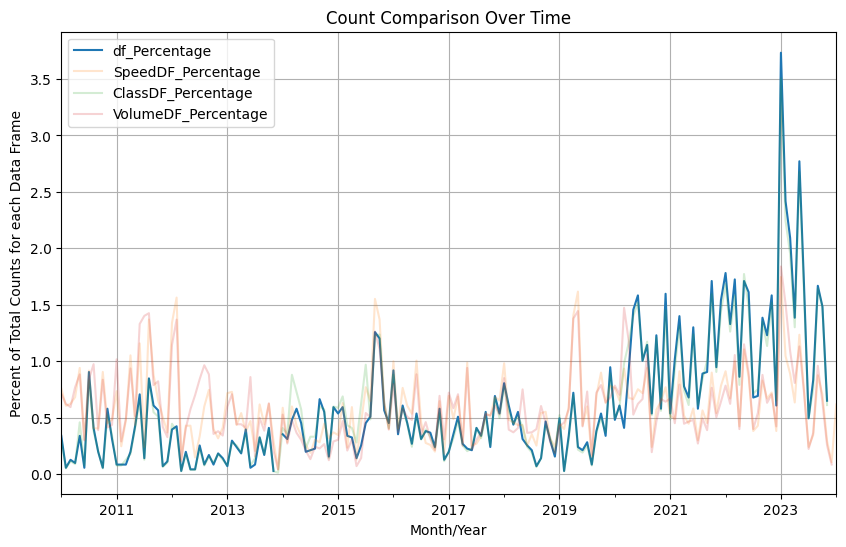

### Data Exploration

Prior to feature selection the newly merged data frame was explored for further understanding. Firstly, the distribution of values within the Posted Speed and PctOverPosted columns were explored utilizing the pyplot package for boxplots and simple IQR calculations to remove outliers. The following boxplots depict PctOverPosted and PostedSpeed ebfore and after outlier removal:

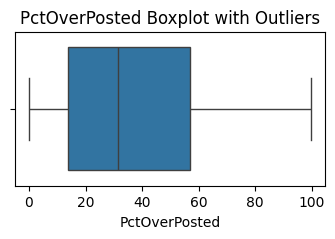
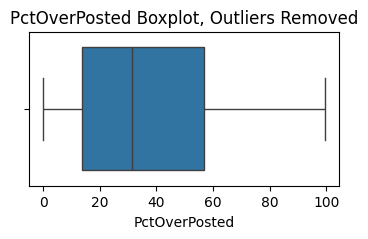

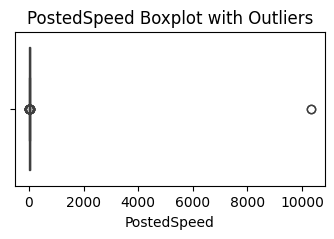
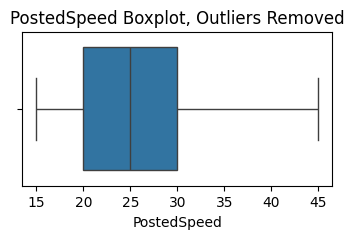

Next, aggregate statistics were calculated by Start Day for PctOverPosted, PctOverPosted10, and ADTVolume to explore the variation in speeding and traffic behavior by day. In order to better understand the difference between posted speed limits and the reported speed percentiles, differences were calculated for each data point. The top 15 largest differences are displayed below, grouped by location description:

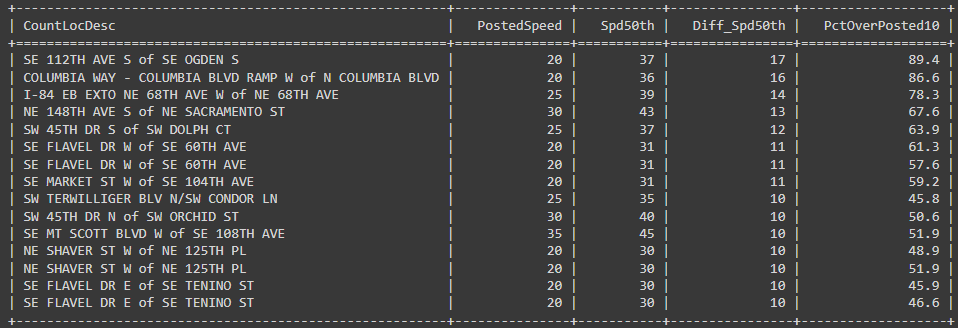

Finally, the following graphs depicting PctOverPosted and PctOverPosted10 over month and year timeframes were created using pyplot to uncover any potential historical or seasonal trends within the data:

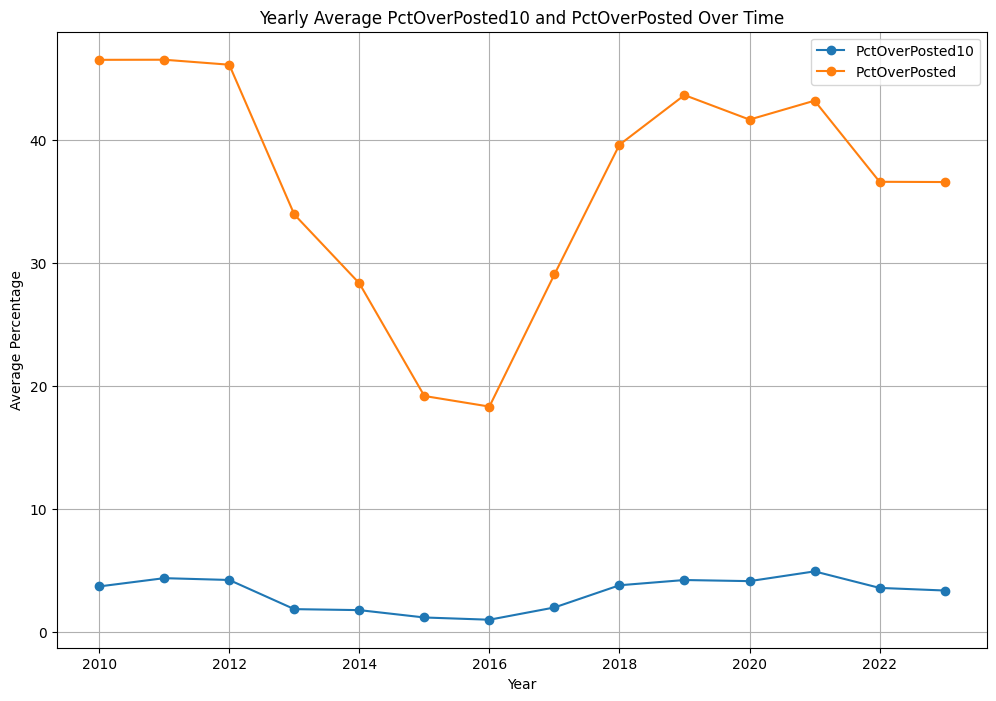

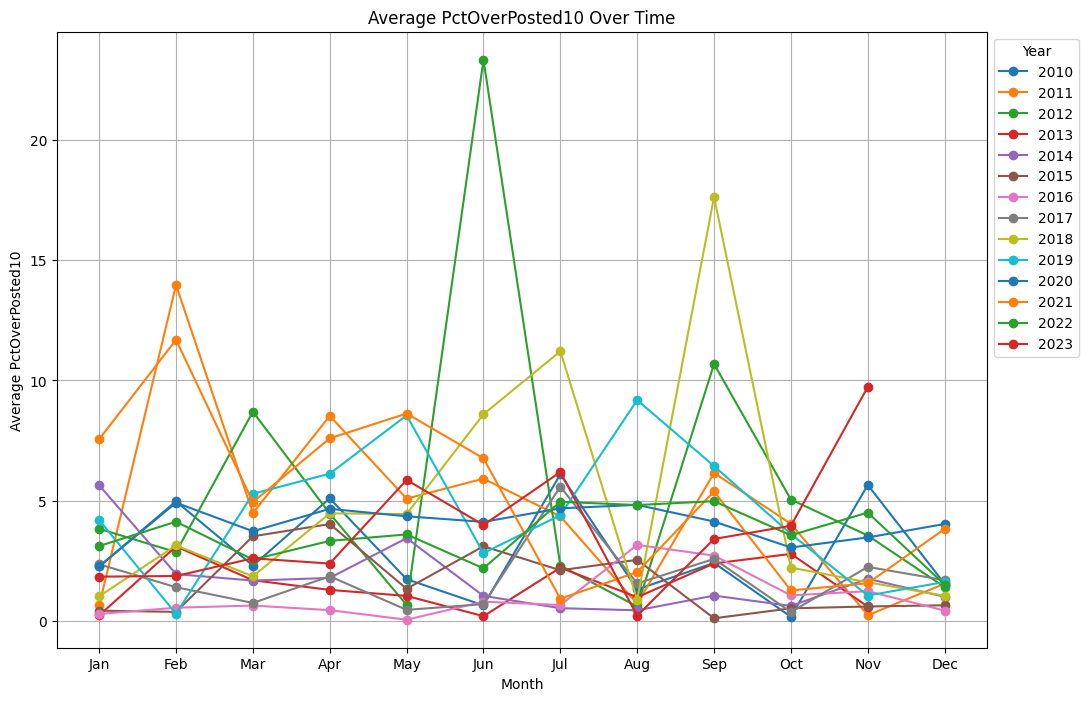

### Feature Selection

PctOverPosted10 was identified as the initial target variable for this analysis however, after early modelling, the team determined to create a new binary classification from PctOverPosted10 for greater simplicity and explainability. This binary variable is 1 for any row with a PctOverPosted10 greater than 0, otherwise 0. In other words, classifying any measurements where speeds 10MPH or greater over the speed limit were measured. This new binary variable was named 10OverSpeeding and was utilized as the target variable in the final analysis. Future research using this same dataset could vary the cuytoff threshold for this binary variable in order to better target the most severe speeding cases.


An initial list of features of interest was defined including the following variables: 10OverSpeeding, AMPkHrVol, AMVolume, PMPkHrVol, PMVolume, PctCars, PostedSpeed, X, ADTVolume, Y, StartDay, and Month. Dummy variables were created for StartDay using the pandas get_dummies() function. These features were then run through automated selection where scikit-learn was used to rank them by importance in the Recursive Feature Elimination (RFE) process with a Decision Tree classifier as the estimator. The top 10 features were maintained and the following final correlation matrix was generated using matplotlib and seaborn for heatmap visualization:


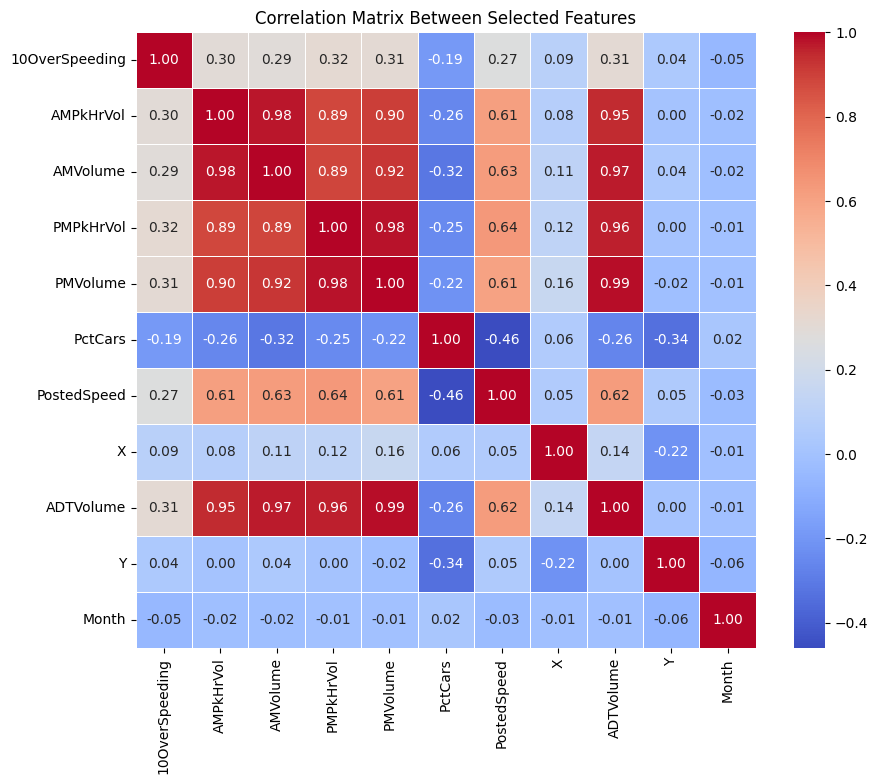

### Modeling

#### Decision Tree
The first model analyzed in this project was a Decision Tree Classifier. First, the data were split into training and testing sets using scikit-learn's train_test_split function for the features defined in the previous section. The data was divided into 80% training and 20% testing with stratification to ensure the class distribution between sets was not imbalanced. Next, scikit-learn's Grid Search Cross-Validation was used to determine the ideal parameters for the Decision Tree. The Tree was then fit on the training data, and predicted on the training and testing sets. The accuracy of the model was assessed using scikit-learn's accuracy_score, precision_score, and recall_score for both training and testing sets. A confusion matrix was also generated for both sets using  pyplot and seaborn packages, as shown here:

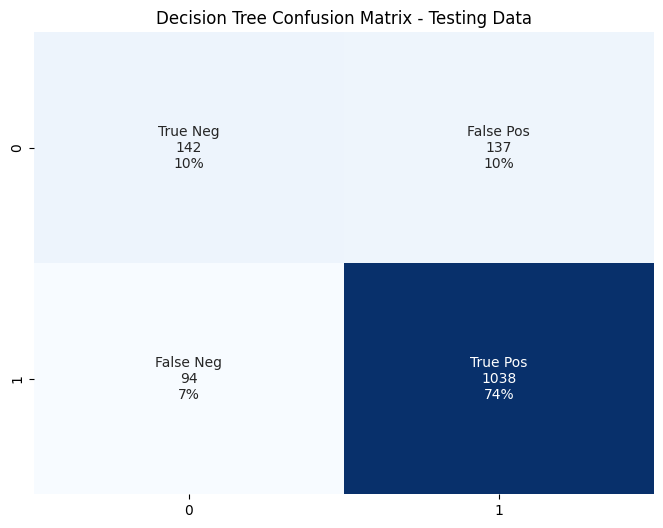

Based on the Decision Tree rules, the predictive features for the next models were narrowed down from 10 to just the top 5. The feature's importance was calculated and then ranked. The data was then scaled using scikit-learn's StandardScaler and the training and testing sets were redefined using the new top 5 features.

#### Logistic Regression

A Logistic Regression model was fit on the training data for the top 5 features defined above. The data was divided into 80% training and 20% testing sets with stratification just like the previous Decision Tree model. Predictions were then made on both the training and testing sets. To evaluate the model's performance and ability to generalize on new data confusion matrices plus accuracy, precision, and recall scores were calculated and printed for both sets. The following confusion matrix depicts the predictive outcomes from the Logistic Regressions's testing set:

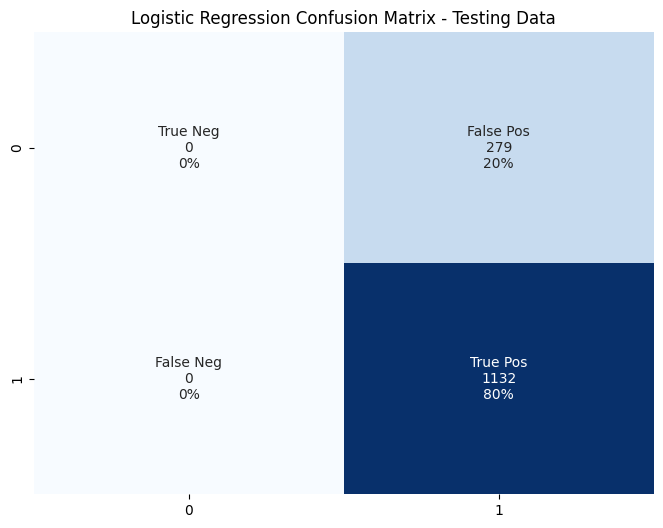

#### K-Nearest Neighbors

Following the procedure of the Logistic Regression analysis, a K-NN Classification model was also utilized. The K-NN model was fit using the same training set as defined above and then predictions were made on both the training and testing sets to assess performance and generalizability. Predictions from the model were then visualized using confusion matrices, with the testing matrix shown here:

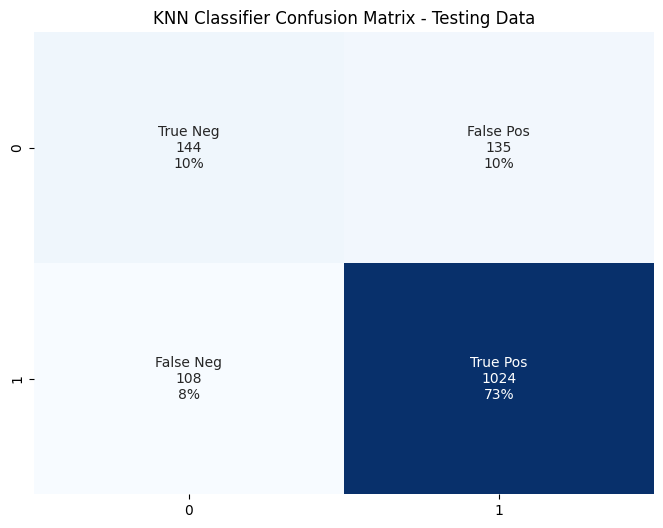

#### Stacked Ensemble
The final model was a stacked ensemble, which combined the three preceding models to develop a robust model encompassing the strengths of the prior three.

With the model, we were able to attain the following results:
* Accuracy: .863
* Precision: .89
* Recall: .947

The confusion matrix shown here demonstrates the overall model reliability:
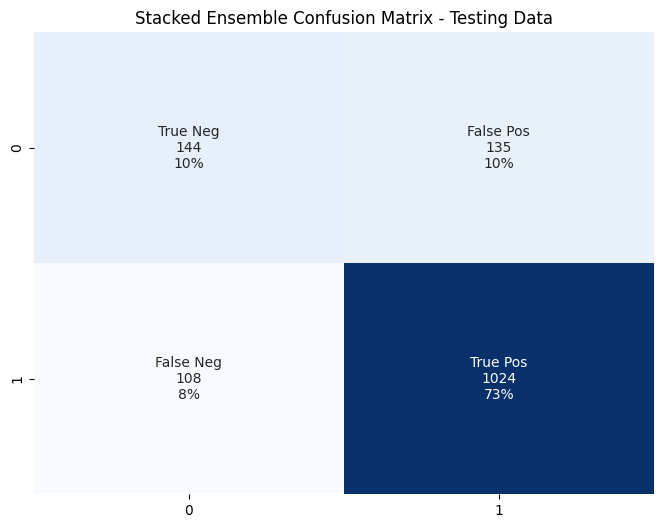

The final performance indicators for each model, shown below, demonstrate the benefit of using the stacked ensemble, with the prior three models as its backbone, for our final model:

\begin{array}{ c c c c }
 \textbf{Model} & \textbf{Accuracy} & \textbf{Precision} & \textbf{Recall} \\
 Decision Tree & 0.836 & 0.883 & 0.917 \\
 Logistic Regression & 0.802 & 0.802 & 1.0 \\
 KNN Classifier & 0.828 & 0.884 & 0.905 \\
 Stacked Ensemble & 0.863 & 0.890 & 0.947   
\end{array}

## Analysis & Findings
The analysis and findings reveal critical insights into speeding incidents on Portland's roadways, derived from comprehensive examination of traffic volume, vehicle class, and traffic speed data sets. Through this analysis, we identified the top 15 locations with the greatest mean speed exceeding posted limits, comparing them with overspeed percentiles. Notably, SE Division St E of SE 33rd Ave ranked highest, with SE 112th Ave S of SE Ogden St and Columbia Way - Columbia Blvd Ramp W of N Columbia Blvd following closely. Additionally, we examined the top 15 locations with the highest speeds for the 90th percentile, further highlighting areas of concern for overspeeding. Moreover, historical trends from 2010 to 2023 indicated fluctuations in overspeeding, with peak incidents occurring during AM and PM rush hours.

Predictive modeling using decision trees, logistic regression, K-NN, and stacked ensembles identified key predictors such as AM Volume, X, Y, ADT Volume, and Pct Cars. Our models demonstrated strong performance metrics, with logistic regression showing an accuracy of 0.802, precision of 0.802, and recall of 1 for both training and testing data sets. Similarly, the KNN classifier exhibited robust performance with comparable metrics. The greatest overall accuracy was seen in the stacked ensemble model which had an accuracy of 0.863, precision of 0.890, and recall of 0.947. The comparison of all models yielded valuable insights, with the stacked ensemble having the greatest overall performance. This high performance on the testing datasets indicates that the models are able to generalize well to new data. This could make them useful tools for predicting whether overspeeding incidences will occur based on key traffic and location metrics. Overall, these findings underscore the importance of data-driven approaches in understanding and addressing speeding behaviors to enhance road safety in Portland.

## Business Applications
The findings and analysis presented in this project hold significant implications for improving road safety and transportation management in Portland. By identifying key locations with high instances of speeding and understanding the underlying factors contributing to these behaviors, transportation authorities can implement targeted interventions to mitigate risks and enhance road safety. These interventions may include the deployment of speed enforcement measures, such as speed cameras or increased police patrols, in identified hotspot areas. Additionally, the insights gained from historical trends and predictive modeling can inform the development of proactive strategies to anticipate and address future challenges related to speeding incidents. <br>

The identification of key predictors for speeding behaviors, such as traffic volume and time of day, can inform urban planning and infrastructure development initiatives. For instance, city planners can use this information to optimize traffic flow and design safer roadways that effectively accommodate varying traffic conditions. Moreover, the predictive models developed in this project can serve as valuable decision support tools for transportation agencies, enabling them to allocate resources more efficiently and prioritize interventions based on the likelihood of speeding incidents occurring in specific locations.

## Recommendations
Based on the analysis and findings presented in this project, several key recommendations can be made to Portland's Bureau of Transportation to improve road safety and address the issue of speeding incidents. Firstly, targeted enforcement measures may be implemented using the insights gained from the identification of high-speeding locations. Enforcement measures could include speed cameras or increased police presence in hotspot areas aimed at deterring speeding behaviors. Secondly, utilizing insights from traffic volume and vehicle classes, infrastructure investments may be made in targeted areas to calm traffic using features such as speed bumps or traffic islands. Most importantly, this project acts as a proof of concept that data driven decision-making is possible from the wealth of data collected by the City of Portland. Our key recommendation is that PBOT continues to update and maintain this data, and further supplementing it with other relevant factors to inform decision-making processes related to road safety and transportation management. While the data currently available provides some helpful insights, any additional data which can be incorporated for speed enforcement measures, infrastructure updates, or other key influences will be crucial for measuring and predicting future success. Finally, PBOT should continue to collaborate closely with community stakeholders and provide regular data updates and reports. Collaborative efforts can help build consensus around proposed interventions and ensure their effectiveness in addressing community concerns.

## Conclusion
The project "Predictive Analysis of Speeding Incidents by Vehicle Type, Location, and Time" has provided valuable insights into the pressing issue of speeding incidents on Portland's roadways. Through comprehensive data analysis and predictive modeling, we have identified key factors contributing to speeding behaviors, highlighted high-speeding locations, and assessed historical trends in speeding incidents over time. Our findings underscore the urgent need for targeted interventions to address speeding and enhance road safety in Portland. <br>

This project has laid the foundation for evidence-based interventions to improve road safety and enhance the quality of life for Portland residents and visitors. By leveraging data analytics and predictive modeling, we can work towards creating a safer and more sustainable transportation system that benefits all members of the community.

## References


[Traffic Counts](https://www.portland.gov/transportation/traffic-operations/how-we-gather-traffic-counts)<br>
[Portland.gov](//www.portland.gov/)<br>
[NE Ainsworth Traffic Calming
Projects](https://www.portland.gov/transportation/pbot-projects/documents/woodlawn-neighborhood-presentation-ainsworth-traffic-calming/download)<br>


<br>

----
## Code Appendix

### Preliminaries

In [6]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime as dt
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from prettytable import PrettyTable

In [7]:
# set analysis date/time
now = dt.now()
print ("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M"))

Analysis on 2024-07-27 at 10:52
Analysis on 2024-07-27 at 10:52


### Data Preparation
---



In [8]:
# read in and name speed csv
SpeedDF = pd.read_csv('data/TRAFFIC-Speed_Counts.csv')
SpeedDF.name = 'SpeedDF'
SpeedDF.head().transpose()

<positron-console-cell-8>:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.


,0,1,2,3,4
X,-13666261.3309,-13666261.3309,-13663930.6133,-13663930.6133,-13663904.8261
Y,5722466.9793,5722466.9793,5711463.6992,5711463.6992,5711466.2873
OBJECTID,1,2,3,4,5
CountID,10010422.SP2,10010422.SP2,10010430.sp2,10010430.sp2,10010421.SP1
ChannelID,505638,505639,505648,505649,505642
LocationDesc,N LOMBARD ST E of SIMMONS RD,N LOMBARD ST E of SIMMONS RD,NW 61ST AVE S of FRONT AVE,NW 61ST AVE S of FRONT AVE,NW FRONT AVE E of 61ST AVE
Bound,E,W,N,S,N
StartDate,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00
StartDay,MON,MON,MON,MON,MON
StartTime,12:00:00,12:00:00,13:00:00,13:00:00,13:00:00


In [9]:
# read in and name class csv
ClassDF = pd.read_csv('data/TRAFFIC-Class_Counts.csv')
ClassDF.name = 'ClassDF'
ClassDF.head().transpose()

,0,1,2,3,4
X,-13666261.3309,-13666261.3309,-13663904.8261,-13663904.8261,-13663933.6073
Y,5722466.9793,5722466.9793,5711466.2873,5711466.2873,5711498.9549
OBJECTID,1,2,3,4,5
CountID,10010422.CL2,10010422.CL2,10010421.CL1,10010432.CL1,10011227.CL2
ChannelID,500769,500770,500773,500776,500781
LocationDesc,N LOMBARD ST E of SIMMONS RD,N LOMBARD ST E of SIMMONS RD,NW FRONT AVE E of 61ST AVE,NW FRONT AVE E of 61ST AVE,NW FRONT AVE N of 61ST AVE
Bound,E,W,N,S,N
StartDate,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/12 00:00:00+00
StartDay,MON,MON,MON,MON,TUE
StartTime,12:00:00,12:00:00,13:00:00,13:00:00,15:00:00


In [10]:
# read in and name volume csv
VolumeDF = pd.read_csv('data/TRAFFIC-Volume_Counts.csv')
VolumeDF.name = 'VolumeDF'
VolumeDF.head().transpose()

<positron-console-cell-10>:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.


,0,1,2,3,4
X,-13666261.3309,-13666261.3309,-13663930.6133,-13663930.6133,-13663904.8261
Y,5722466.9793,5722466.9793,5711463.6992,5711463.6992,5711466.2873
OBJECTID,1,2,3,4,5
CountID,10010422.VL2,10010422.VL2,10010430.vl2,10010430.vl2,10010421.VL1
ChannelID,506851,506852,506872,506873,506855
LocationDesc,N LOMBARD ST E of SIMMONS RD,N LOMBARD ST E of SIMMONS RD,NW 61ST AVE S of FRONT AVE,NW 61ST AVE S of FRONT AVE,NW FRONT AVE E of 61ST AVE
Bound,E,W,N,S,N
StartDate,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00,2010/01/04 00:00:00+00
StartDay,MON,MON,MON,MON,MON
StartTime,11:15:00,11:15:00,12:30:00,12:30:00,13:00:00


In [11]:
# establish dataframe iterable
DFs = [VolumeDF, ClassDF, SpeedDF]

# drop columns known to not be needed
for i in DFs:
  i.drop(columns=['StartTime', 'EndTime', 'ChannelNum', 'NumChannels',
                  'Comment', 'LocationClass', 'Conditions', 'DeviceRef'], inplace=True)
  i.info()
  print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21056 entries, 0 to 21055
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             21056 non-null  float64
 1   Y             21056 non-null  float64
 2   OBJECTID      21056 non-null  int64  
 3   CountID       21056 non-null  object 
 4   ChannelID     21056 non-null  int64  
 5   LocationDesc  21056 non-null  object 
 6   Bound         21056 non-null  object 
 7   StartDate     21056 non-null  object 
 8   StartDay      21056 non-null  object 
 9   EndDate       21056 non-null  object 
 10  EndDay        21056 non-null  object 
 11  ADTVolume     21056 non-null  int64  
 12  AMVolume      21056 non-null  int64  
 13  AMPkHrVol     21056 non-null  int64  
 14  AMPkHrTime    21056 non-null  object 
 15  AMPkHrFactor  21056 non-null  float64
 16  PMVolume      21056 non-null  int64  
 17  PMPkHrVol     21056 non-null  int64  
 18  PMPkHrTime    21056 non-nu

Here, the DataFrame in the list 'DFs' and generates value counts for the 'Bound', 'StartDay', and 'EndDay' columns, providing insights into the distribution of these variables.

In [12]:
# review values in the bound column
for i in DFs:
  print(i['Bound'].value_counts())
  print(i['StartDay'].value_counts())
  print(i['EndDay'].value_counts(),'\n')

Bound
E      5703
W      5691
N      4819
S      4735
D        19
s        19
n        18
e        16
w        16
E-S       7
L         4
T         2
/         2
SE        1
NW        1
B         1
C         1
M         1
Name: count, dtype: int64
StartDay
MON    5728
TUE    5470
WED    4878
THU    3556
SAT     664
SUN     554
FRI     206
Name: count, dtype: int64
EndDay
FRI    10404
THU     4298
WED     3458
TUE     1499
SUN      638
SAT      590
MON      169
Name: count, dtype: int64 

Bound
E        2123
W        2084
N        1808
S        1779
NB LL       8
EB          5
NB RL       4
BND         4
S RL        4
30          2
EW          2
S.BND       2
SB          2
WB          2
WBND        2
.W          2
NS          1
NB          1
s           1
n           1
20          1
35          1
NBND        1
EBND        1
/S          1
e           1
B           1
Name: count, dtype: int64
StartDay
MON    2325
TUE    2229
WED    1906
THU    1180
SAT     106
SUN      85
FRI      18
Name

In [13]:
# update bound values for uniformity
for i in DFs:
  i['Bound'] = i['Bound'].str.upper()
  i['Bound'] = i['Bound'].str.replace('E-S', 'SE', regex=False)
  i['Bound'] = i['Bound'].str.replace('EB.*', 'E', regex=True)
  i['Bound'] = i['Bound'].str.replace('\?.WB.*', 'W', regex=True)
  i['Bound'] = i['Bound'].str.replace('(NB.*)|(BND)', 'N', regex=True)
  i['Bound'] = i['Bound'].str.replace('\?/S?/s?\.B.*', 'S', regex=True)

# establish df to input duplicate ids
duplicateIDs = pd.DataFrame()

# iterate through dfs to create ids & check for duplicates
for i in DFs:
  i['ID'] = i['CountID'].str.split('.', n=1, expand=True)[0]+'_'+i['Bound']+'_' # generate IDs
  i.insert(0, 'ID', i.pop('ID')) # move IDs to first columns
  duplicateIDs = pd.concat([duplicateIDs,i[i['ID'].duplicated()]]) # add duplicated ID in single df to duplicateIDs
  i.drop(columns=['CountID', 'Bound'], inplace=True)
  print(i.name,':')
  print('    ',len(i.index),'rows')
  print('    ',i['ID'].nunique(),'unique IDs\n')

<positron-console-cell-13>:6: SyntaxWarning: invalid escape sequence '\?'
<positron-console-cell-13>:8: SyntaxWarning: invalid escape sequence '\?'


VolumeDF :
     21056 rows
     21040 unique IDs

ClassDF :
     7849 rows
     7839 unique IDs

VolumeDF :
     21056 rows
     21040 unique IDs

ClassDF :
     7849 rows
     7839 unique IDs



SpeedDF :
     17016 rows
     17005 unique IDs

SpeedDF :
     17016 rows
     17005 unique IDs



In [14]:
# check size of duplicate ids
duplicateIDs.shape

(35, 39)

In [15]:
# drop duplicate id rows from each df (if low impact)
for i in DFs:
  i.drop(i[i['ID'].duplicated()].index, axis=0, inplace=True)

In [16]:
# list column names used for merge
connections = ['ID', 'StartDate', 'EndDate']

# set name suffixes for columns
suffixes = ['_Volume', '_Class', '_Speed'] # same order as DFs variable

# establish list of repeated column names
repeats = list(set(SpeedDF.columns) & set(VolumeDF.columns) & set(ClassDF.columns))
repeats = [i for i in repeats if i not in connections]

# iterate through dfs & repeated columns to add suffixes
y = 0
for i in DFs:
  for x in repeats:
    i.rename(columns={x: x + suffixes[y]}, inplace=True)
  i.info()
  y += 1

<class 'pandas.core.frame.DataFrame'>
Index: 21040 entries, 0 to 21055
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   21040 non-null  object 
 1   X_Volume             21040 non-null  float64
 2   Y_Volume             21040 non-null  float64
 3   OBJECTID_Volume      21040 non-null  int64  
 4   ChannelID_Volume     21040 non-null  int64  
 5   LocationDesc_Volume  21040 non-null  object 
 6   StartDate            21040 non-null  object 
 7   StartDay_Volume      21040 non-null  object 
 8   EndDate              21040 non-null  object 
 9   EndDay_Volume        21040 non-null  object 
 10  ADTVolume_Volume     21040 non-null  int64  
 11  AMVolume             21040 non-null  int64  
 12  AMPkHrVol            21040 non-null  int64  
 13  AMPkHrTime           21040 non-null  object 
 14  AMPkHrFactor         21040 non-null  float64
 15  PMVolume             21040 non-null  int6

In [17]:
# merge dfs into one big one, keeping all values
df = SpeedDF.merge(ClassDF, how='outer', on=connections).merge(VolumeDF, how='outer', on=connections)

# check how many duplicated ids there are in the big df
df[df['ID'].duplicated()].shape

(440, 65)

In [18]:
# compare the size of the whole df
df.shape

(22736, 65)

In [19]:
# drop duplicated id rows if it makes sense
df.drop(df[df['ID'].duplicated()].index, axis=0, inplace=True)
df[df['ID'].duplicated()] # verify

,ID,X_Speed,Y_Speed,OBJECTID_Speed,ChannelID_Speed,LocationDesc_Speed,StartDate,StartDay_Speed,EndDate,EndDay_Speed,ADTVolume_Speed,Spd50th,Spd70th,Spd85th,Spd90th,PostedSpeed,PctOverPosted,PctOverPosted10,ExceptType_Speed,NumSlots,Duration_Speed,IntervalLen_Speed,LocationID_Speed,CountLocDesc_Speed,CountType_Speed,X_Class,Y_Class,OBJECTID_Class,ChannelID_Class,LocationDesc_Class,StartDay_Class,EndDay_Class,ADTVolume_Class,PctCars,PctTrucks,TwoAxleCF,ExceptType_Class,NumCategories,Duration_Class,IntervalLen_Class,LocationID_Class,CountLocDesc_Class,CountType_Class,X_Volume,Y_Volume,OBJECTID_Volume,ChannelID_Volume,LocationDesc_Volume,StartDay_Volume,EndDay_Volume,ADTVolume_Volume,AMVolume,AMPkHrVol,AMPkHrTime,AMPkHrFactor,PMVolume,PMPkHrVol,PMPkHrTime,PMPkHrFactor,ExceptType_Volume,Duration_Volume,IntervalLen_Volume,LocationID_Volume,CountLocDesc_Volume,CountType_Volume


In [20]:
# check for null counts
df.isnull().sum()

ID                        1
X_Speed                5486
Y_Speed                5486
OBJECTID_Speed         5486
ChannelID_Speed        5486
                       ... 
Duration_Volume        1511
IntervalLen_Volume     1511
LocationID_Volume      1511
CountLocDesc_Volume    1511
CountType_Volume       1511
Length: 65, dtype: int64

In [21]:
# fill na in for repeated columns using values from other dfs
for i in repeats:
  df[i+'_Speed'] = df[i+'_Speed'].fillna(df[i+'_Volume'])
  df[i+'_Volume'] = df[i+'_Volume'].fillna(df[i+'_Class'])
  df[i+'_Class'] = df[i+'_Class'].fillna(df[i+'_Speed'])
  df[i+'_Speed'] = df[i+'_Speed'].fillna(df[i+'_Volume'])
  df[i+'_Volume'] = df[i+'_Volume'].fillna(df[i+'_Class'])
  df[i+'_Class'] = df[i+'_Class'].fillna(df[i+'_Speed'])

# sort columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)
df.insert(0, 'ID', df.pop('ID')) # move ID to first column

# initial condensed df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22296 entries, 0 to 22734
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22295 non-null  object 
 1   ADTVolume_Class      22296 non-null  float64
 2   ADTVolume_Speed      22296 non-null  float64
 3   ADTVolume_Volume     22296 non-null  float64
 4   AMPkHrFactor         20785 non-null  float64
 5   AMPkHrTime           20785 non-null  object 
 6   AMPkHrVol            20785 non-null  float64
 7   AMVolume             20785 non-null  float64
 8   ChannelID_Class      22296 non-null  float64
 9   ChannelID_Speed      22296 non-null  float64
 10  ChannelID_Volume     22296 non-null  float64
 11  CountLocDesc_Class   22296 non-null  object 
 12  CountLocDesc_Speed   22296 non-null  object 
 13  CountLocDesc_Volume  22296 non-null  object 
 14  CountType_Class      22296 non-null  object 
 15  CountType_Speed      22296 non-null  obje

In [22]:
# iterate to find columns that are perfectly identical
for i in repeats:
  if df[i+'_Speed'].equals(df[i+'_Volume']) is True:
    print(i,'Speed and Volume match')
  if df[i+'_Class'].equals(df[i+'_Volume']) is True:
    print(i,'Class and Volume match')
  if df[i+'_Speed'].equals(df[i+'_Class']) is True:
    print(i,'Speed and Class match')

EndDay Speed and Volume match
EndDay Class and Volume match
EndDay Speed and Class match
EndDay Speed and Volume match
EndDay Class and Volume match
EndDay Speed and Class match


In [23]:
# clear up the low-hanging fruit (columns that perfectly match)
df.drop(columns=['EndDay_Speed', 'EndDay_Class'], inplace=True)
df.rename(columns={'EndDay_Volume':'EndDay'}, inplace=True)
repeats.remove('EndDay')

In [24]:
# figure out how many rows have mismatched values in repeated columns
rep = {}
for i in repeats:
  print(i,':')
  speed_volume = df.iloc[np.where((df[i+'_Speed'] != df[i+'_Volume']))]
  speed_class = df.iloc[np.where((df[i+'_Speed'] != df[i+'_Class']))]
  class_volume = df.iloc[np.where((df[i+'_Class'] != df[i+'_Volume']))]
  mask = pd.concat([speed_volume, speed_class, class_volume])
  mask = mask.drop_duplicates()
  rep[i] = {i+'_Speed': mask[i+'_Speed'],
            i+'_Volume': mask[i+'_Volume'],
            i+'_Class': mask[i+'_Class']}
  print('  ',len(mask),'\n')

ADTVolume :
   14130 

CountLocDesc :
   197 

OBJECTID :
ADTVolume :
   14130 

CountLocDesc :
   197 

OBJECTID :


   15968 

Y :
   55 

X :
   55 

IntervalLen :
   15530 

StartDay :
   96 

ChannelID :
   15968 

Y :
   55 

X :
   55 

IntervalLen :
   15530 

StartDay :
   96 

ChannelID :


   15974 

ExceptType :
   57 

LocationID :
   55 

LocationDesc :
   47 

CountType :
   15974 

ExceptType :
   57 

LocationID :
   55 

LocationDesc :
   47 

CountType :


   15974 

Duration :
   15591 

   15974 

Duration :
   15591 



In [25]:
# select speed as the df of truth for repeated columns, drop others
for i in repeats:
  df[i] = df[i+'_Speed']
  df.drop(i+'_Speed', axis=1, inplace=True)
  df.drop(i+'_Volume', axis=1, inplace=True)
  df.drop(i+'_Class', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22296 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22295 non-null  object 
 1   AMPkHrFactor     20785 non-null  float64
 2   AMPkHrTime       20785 non-null  object 
 3   AMPkHrVol        20785 non-null  float64
 4   AMVolume         20785 non-null  float64
 5   EndDate          22296 non-null  object 
 6   EndDay           22296 non-null  object 
 7   NumCategories    7747 non-null   float64
 8   NumSlots         16810 non-null  float64
 9   PMPkHrFactor     20785 non-null  float64
 10  PMPkHrTime       20785 non-null  object 
 11  PMPkHrVol        20785 non-null  float64
 12  PMVolume         20785 non-null  float64
 13  PctCars          7747 non-null   float64
 14  PctOverPosted    16810 non-null  float64
 15  PctOverPosted10  16810 non-null  float64
 16  PctTrucks        7747 non-null   float64
 17  PostedSpeed      

In [26]:
# remove any other columns known to not be needed
df = df.drop(columns=['NumCategories'])

In [27]:
# identify where one pct exists but the other doens't
pct_missingcars = df[(df['PctTrucks'].notnull()) & (df['PctCars'].isnull())]
pct_missingtrucks = df[(df['PctCars'].notnull()) & (df['PctTrucks'].isnull())]
pct_missingall = df[(df['PctCars'].isnull()) & (df['PctTrucks'].isnull())]

In [28]:
# fill in missing pct
df.loc[pct_missingcars.index, 'PctCars'] = 100-df['PctTrucks']
df.loc[pct_missingtrucks.index, 'PctTrucks'] = 100-df['PctCars']

In [29]:
# check how many are missing both pcts
pct_missingall.shape

(14549, 36)

In [30]:
# review values in TwoAxleCF
df['TwoAxleCF'].describe()

count    7747.000000
mean        0.985774
std         0.033495
min         0.632000
25%         0.990000
50%         0.995000
75%         0.998000
max         1.125000
Name: TwoAxleCF, dtype: float64

In [31]:
# fill missing TwoAxleCF values with median
df['TwoAxleCF'] = df['TwoAxleCF'].fillna(df['TwoAxleCF'].median())

In [32]:
# count of missing values from each row
df.isnull().sum()

ID                     1
AMPkHrFactor        1511
AMPkHrTime          1511
AMPkHrVol           1511
AMVolume            1511
EndDate                0
EndDay                 0
NumSlots            5486
PMPkHrFactor        1511
PMPkHrTime          1511
PMPkHrVol           1511
PMVolume            1511
PctCars            14549
PctOverPosted       5486
PctOverPosted10     5486
PctTrucks          14549
PostedSpeed         5486
Spd50th             5486
Spd70th             5486
Spd85th             5486
Spd90th             5486
StartDate              0
TwoAxleCF              0
ADTVolume              0
CountLocDesc           0
OBJECTID               0
Y                      0
X                      0
IntervalLen            0
StartDay               0
ChannelID              0
ExceptType             0
LocationID             0
LocationDesc           0
CountType              0
Duration               0
dtype: int64

In [33]:
# remove all rows with na values, leaving a clean dataset
df = df.dropna()
df.shape

(7072, 36)

In [34]:
# final dataframe
df.head().transpose()

,2,3,4,10,31
ID,10010421_N_,10010422_E_,10010422_W_,10010432_S_,10011224_N_
AMPkHrFactor,0.532,0.798,0.78,0.726,0.885
AMPkHrTime,2010/01/04 06:45:00+00,2010/01/04 07:30:00+00,2010/01/04 06:15:00+00,2010/01/04 06:00:00+00,2010/01/12 08:00:00+00
AMPkHrVol,149.0,217.0,343.0,209.0,170.0
AMVolume,632.0,1227.0,1992.0,895.0,724.0
EndDate,2010/01/06 00:00:00+00,2010/01/05 00:00:00+00,2010/01/05 00:00:00+00,2010/01/06 00:00:00+00,2010/01/15 00:00:00+00
EndDay,WED,TUE,TUE,WED,FRI
NumSlots,13.0,13.0,13.0,13.0,13.0
PMPkHrFactor,0.435,0.771,0.917,0.867,0.964
PMPkHrTime,2010/01/04 18:30:00+00,2010/01/04 15:15:00+00,2010/01/04 14:15:00+00,2010/01/04 12:00:00+00,2010/01/12 17:00:00+00


#### Verify impact of dropped rows

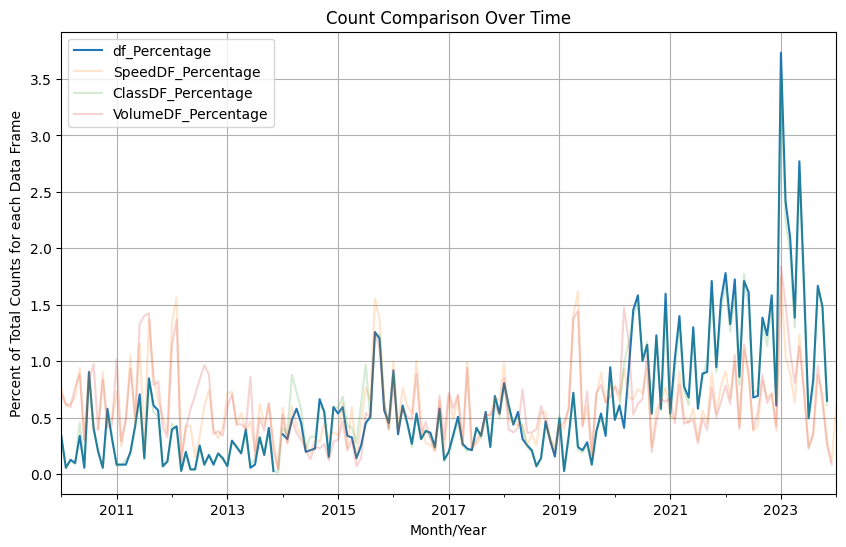

In [35]:
# suppress warnings for datetaime conversion
import warnings
warnings.filterwarnings("ignore",
                        message="Converting to PeriodArray/Index representation will drop timezone information.")

def extract_month_year(origin, df_name, column_name):
    new_df = pd.DataFrame()
    new_df['Month_Year'] = pd.to_datetime(origin[column_name]).dt.to_period('M')
    # count occurrences of each unique month/year combo
    count_df = new_df['Month_Year'].value_counts().reset_index()
    count_df.columns = ['Month_Year', 'Count']
    # sum the counts
    sum_count = count_df['Count'].sum()
    # calculate percentage of sum for each month/year combo
    count_df['Percentage'] = (count_df['Count'] / sum_count) * 100
    # rename column according to dataframe name
    count_df.rename(columns={'Percentage': f'{df_name}_Percentage'}, inplace=True)
    return count_df.set_index('Month_Year')[[f'{df_name}_Percentage']]

# apply function to each dataframe
df_percentages = extract_month_year(df, 'df', 'StartDate')
Speed_DF_percentages = extract_month_year(SpeedDF, 'SpeedDF', 'StartDate')
Class_DF_percentages = extract_month_year(ClassDF, 'ClassDF', 'StartDate')
Volume_DF_percentages = extract_month_year(VolumeDF, 'VolumeDF', 'StartDate')

# merge the percentage dataframes
freq_df = pd.merge(df_percentages, Speed_DF_percentages, on='Month_Year', how='outer')
freq_df = pd.merge(freq_df, Class_DF_percentages, on='Month_Year', how='outer')
freq_df = pd.merge(freq_df, Volume_DF_percentages, on='Month_Year', how='outer')

# sort the index
freq_df.sort_index(inplace=True)

# plot the results
ax = freq_df.plot(kind='line', figsize=(10, 6))
ax.lines[0].set_alpha(1)
for line in ax.lines[1:]:
    line.set_alpha(0.2)

plt.title('Count Comparison Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Percent of Total Counts for each Data Frame')
plt.grid(True)
plt.legend()
plt.show()

### Data Exploration
---



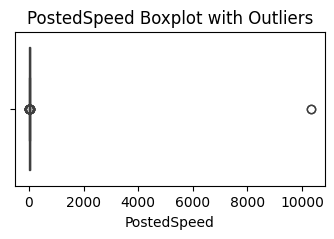

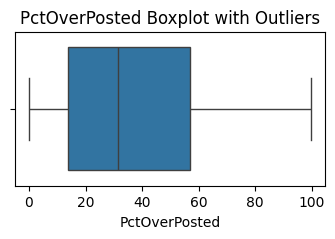

In [36]:
# visualizing outliers
variables = ['PostedSpeed', 'PctOverPosted']
for variable in variables:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[variable])
    plt.title(f"{variable} Boxplot with Outliers")
    plt.show()

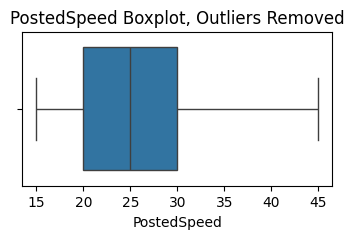

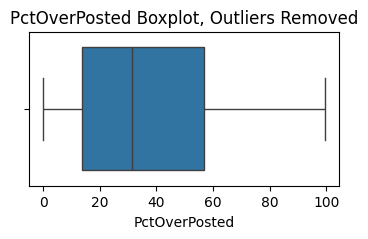

In [37]:
# dropping outliers using IQR
for variable in variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Identify and drop
    outliers_index = (df[variable] < lower_threshold) | (df[variable] > upper_threshold)
    df = df[~outliers_index]

# new df after dropping outliers
for variable in variables:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[variable])
    plt.title(f"{variable} Boxplot, Outliers Removed")
    plt.show()

#### Feature Engineering
---



Aggregated Statistics : statistics such as mean, median, maximum, or minimum speed for each vehicle type, location, and time interval. These statistics can provide insights into the typical speeding behavior in different scenarios.

In [38]:
# Variables for calculation
StatVariables = ['PctOverPosted', 'PctOverPosted10', 'ADTVolume']

In [39]:
# Means, Median, Min, and Max grouped by Start Day
StartDayStats_df = pd.DataFrame()

for variable in StatVariables:
    stats_by_day = df.groupby(['StartDay'])[variable].agg(['mean', 'median', 'min', 'max']).reset_index()
    stats_by_day.rename(columns={
        'mean': f'{variable}_mean',
        'median': f'{variable}_median',
        'min': f'{variable}_min',
        'max': f'{variable}_max'
    }, inplace=True)
    stats_by_day = stats_by_day.round(2)
    StartDayStats_df = pd.concat([StartDayStats_df, stats_by_day], axis=1)

output_string = StartDayStats_df.to_string(index=False,)
print(output_string)


StartDay  PctOverPosted_mean  PctOverPosted_median  PctOverPosted_min  PctOverPosted_max StartDay  PctOverPosted10_mean  PctOverPosted10_median  PctOverPosted10_min  PctOverPosted10_max StartDay  ADTVolume_mean  ADTVolume_median  ADTVolume_min  ADTVolume_max
     FRI               25.35                 23.80                2.7               50.8      FRI                  0.30                    0.25                  0.0                  0.8      FRI         2115.17            1777.5          912.0         4795.0
     MON               36.75                 31.50                0.0               99.6      MON                  3.41                    0.80                  0.0                 86.6      MON         3484.60            2436.0           26.0        25705.0
     SAT               37.87                 37.75                0.2               90.2      SAT                  2.92                    0.95                  0.0                 23.1      SAT         1743.56            1

Speed Deviation from Speed Limit: difference between the observed speed and the posted speed limit for each location and time interval. This can help identify areas where speeding is more prevalent relative to the speed limit.

In [40]:
# Calculate differences between posted and percentile speeds
def calculate_differences(group):
    group['Diff_Spd50th'] = group['Spd50th'] - group['PostedSpeed']
    group['Diff_Spd70th'] = group['Spd70th'] - group['PostedSpeed']
    group['Diff_Spd85th'] = group['Spd85th'] - group['PostedSpeed']
    group['Diff_Spd90th'] = group['Spd90th'] - group['PostedSpeed']
    return group

# Apply the function to each group based on the 'ID' column
# Using _extras for this so as not to add unwanted extra columns to the data
df_extras = df.groupby('ID').apply(calculate_differences).reset_index(drop=True)

# Optional display
#df_extras.head().transpose()

<positron-console-cell-40>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [41]:
# calculate the avg for each 'CountLocDesc'
average_diff_by_countlocdesc = df_extras.groupby('CountLocDesc').agg({
    'Diff_Spd50th': 'mean',
    'Diff_Spd70th': 'mean',
    'Diff_Spd85th': 'mean',
    'Diff_Spd90th': 'mean'
}).reset_index()

# Optional display
average_diff_by_countlocdesc = average_diff_by_countlocdesc.sort_values(by='Diff_Spd90th', ascending=False)
#average_diff_by_countlocdesc.head()

In [42]:
# Display the top 15 rows for locations with the greatest mean speed over posted
top_15_diff_Spd50th = df_extras.nlargest(15, 'Diff_Spd50th')

print(tabulate(top_15_diff_Spd50th[['CountLocDesc', 'PostedSpeed', 'Spd50th', 'Diff_Spd50th','PctOverPosted10']],
               headers=['CountLocDesc', 'PostedSpeed', 'Spd50th', 'Diff_Spd50th','PctOverPosted10'],
               tablefmt='outline', showindex=False))

+--------------------------------------------------------+---------------+-----------+----------------+-------------------+
| CountLocDesc                                           |   PostedSpeed |   Spd50th |   Diff_Spd50th |   PctOverPosted10 |
+========================================================+===============+===========+================+===================+
| SE 112TH AVE S of SE OGDEN S                           |            20 |        37 |             17 |              89.4 |
| COLUMBIA WAY - COLUMBIA BLVD RAMP W of N COLUMBIA BLVD |            20 |        36 |             16 |              86.6 |
| I-84 EB EXTO NE 68TH AVE W of NE 68TH AVE              |            25 |        39 |             14 |              78.3 |
| NE 148TH AVE S of NE SACRAMENTO ST                     |            30 |        43 |             13 |              67.6 |
| SW 45TH DR S of SW DOLPH CT                            |            25 |        37 |             12 |              63.9 |
| SE FLA

In [43]:
# Optional - Display the top 15 rows for locations with the greatest speed for 90th percentile
# top_15_diff_Spd50th = df_extras.nlargest(15, 'Diff_Spd90th')

# print(tabulate(top_15_diff_Spd50th[['CountLocDesc', 'PostedSpeed', 'Spd90th', 'Diff_Spd90th','PctOverPosted10']],
#               headers=['CountLocDesc', 'PostedSpeed', 'Spd90th', 'Diff_Spd90th','PctOverPosted10'],
#               tablefmt='outline', showindex=False))

Historical Features: to capture trends and seasonality in speeding behaviour.

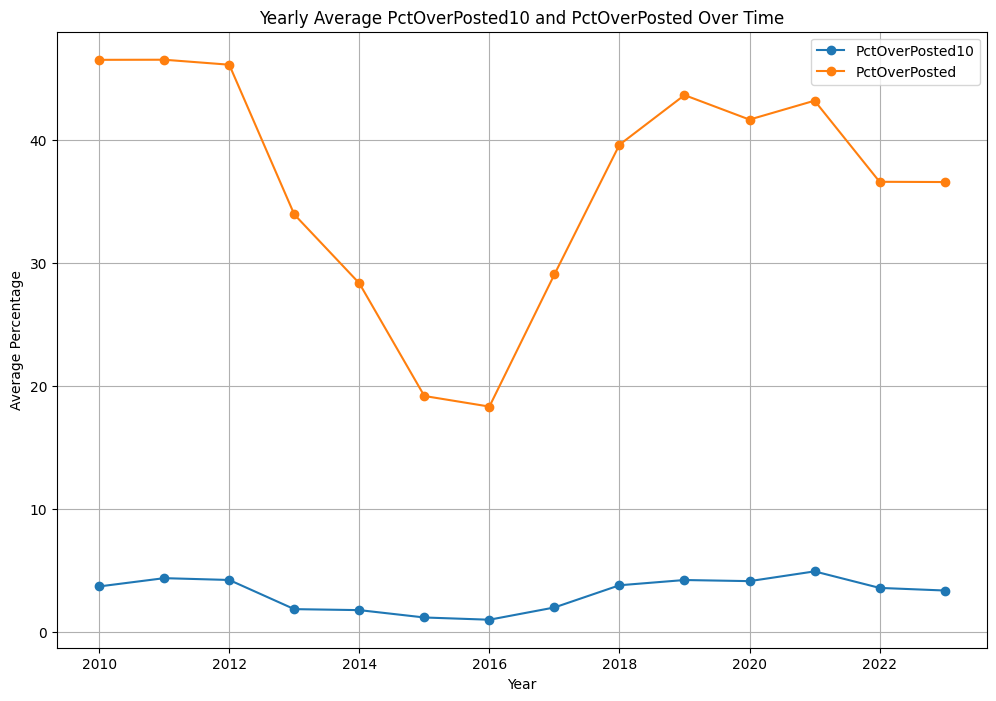

In [44]:
# Yearly average over time

# Convert StartDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Extract the year from StartDate
df['Year'] = df['StartDate'].dt.year

# Calculate average PctOverPosted10 and PctOverPosted by grouping only by 'Year'
yearlyavg_pctover10 = df.groupby('Year')['PctOverPosted10'].mean()
yearlyavg_pctover = df.groupby('Year')['PctOverPosted'].mean()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(yearlyavg_pctover10.index, yearlyavg_pctover10.values, marker='o', linestyle='-', label='PctOverPosted10')
plt.plot(yearlyavg_pctover.index, yearlyavg_pctover.values, marker='o', linestyle='-', label='PctOverPosted')

plt.title('Yearly Average PctOverPosted10 and PctOverPosted Over Time')
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.grid(True)
plt.legend()
plt.show()

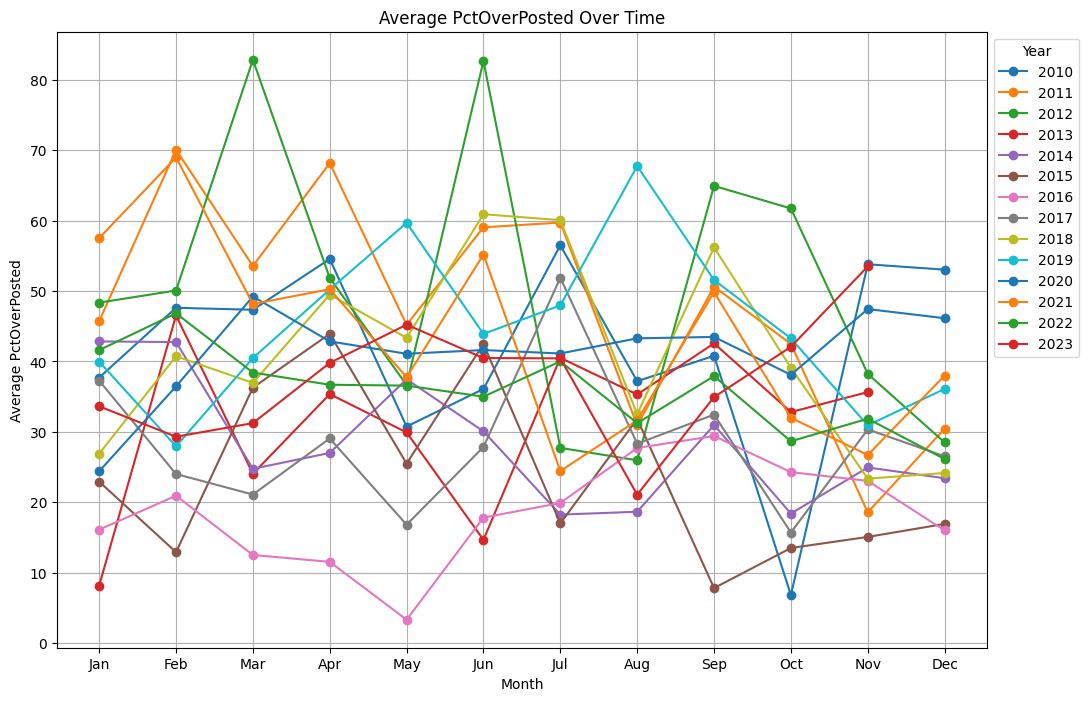

In [45]:
# Monthly aggregation PctOverPosted

# Convert StartDate to datetime
df = df.copy()
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Extract the year and month from StartDate
df['Year'] = df['StartDate'].dt.year
df['Month'] = df['StartDate'].dt.month

# Calculate average PctOverPosted
avg_pct_over_time = df.groupby(['Year', 'Month'])['PctOverPosted'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
for year in avg_pct_over_time.index:
    plt.plot(range(1, 13), avg_pct_over_time.loc[year], marker='o', label=f'{year}')

plt.title('Average PctOverPosted Over Time')
plt.xlabel('Month')
plt.ylabel('Average PctOverPosted')
plt.grid(True)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

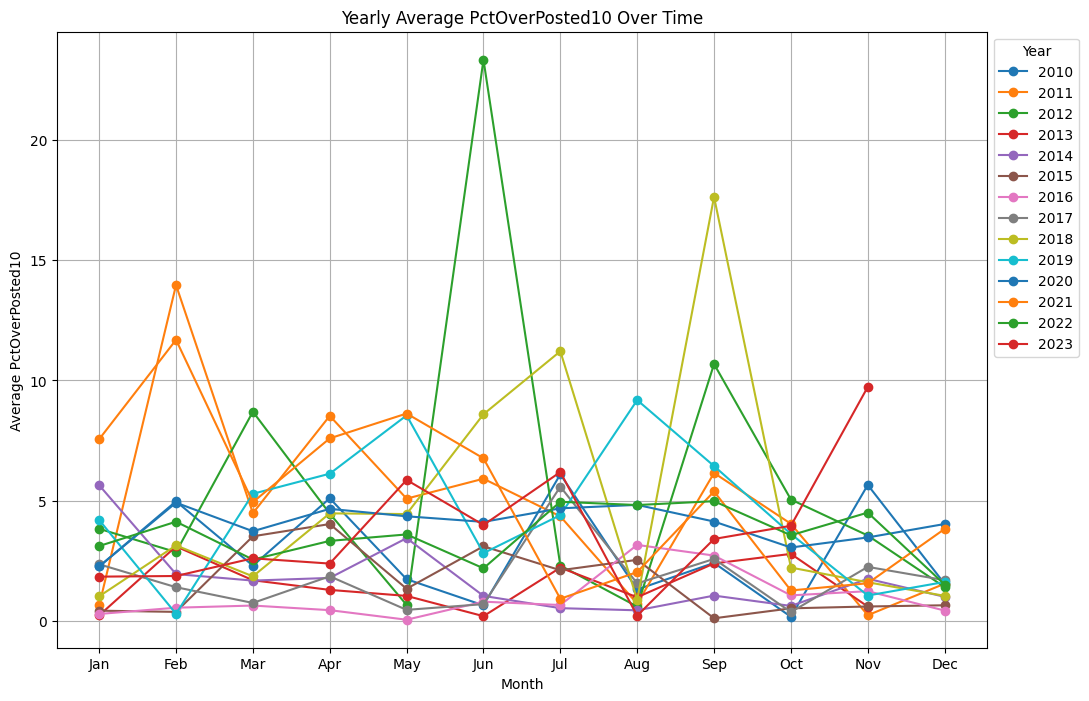

In [46]:
# Monthly aggregation PctOverPosted10

# Convert StartDate to datetime
df = df.copy()
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Extract the year and month from StartDate
df['Year'] = df['StartDate'].dt.year

# Calculate average PctOverPosted10
yearly_avg_pct_over_time10 = df.groupby(['Year','Month'])['PctOverPosted10'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
for year in yearly_avg_pct_over_time10.index:
    plt.plot(range(1, 13), yearly_avg_pct_over_time10.loc[year], marker='o', label=f'{year}')

plt.title('Yearly Average PctOverPosted10 Over Time')
plt.xlabel('Month')
plt.ylabel('Average PctOverPosted10')
plt.grid(True)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1., 1), loc='upper left')
plt.show()

### Feature Selection

In [47]:
# create new column "Over10Speeders" where any PctOver10 > 0 is marked 1
df['10OverSpeeding'] = df['PctOverPosted10'].apply(lambda x: 1 if x > 0 else 0)
col = df.pop('10OverSpeeding')
df.insert(0, col.name, col)

# drop redundant column PctOverPosted10
df.drop(columns=['PctOverPosted10'], inplace=True)

# review correlations to target
df.corr(numeric_only = True)['10OverSpeeding'].sort_values().round(2)

PctCars          -0.19
TwoAxleCF        -0.16
Month            -0.05
ChannelID        -0.03
OBJECTID         -0.03
Year             -0.02
IntervalLen       0.01
NumSlots          0.01
Y                 0.04
Duration          0.08
X                 0.09
PctTrucks         0.19
PostedSpeed       0.27
AMVolume          0.29
AMPkHrVol         0.30
AMPkHrFactor      0.30
PMPkHrFactor      0.31
PMVolume          0.31
ADTVolume         0.31
PMPkHrVol         0.32
Spd90th           0.41
Spd85th           0.47
Spd70th           0.50
Spd50th           0.50
PctOverPosted     0.52
10OverSpeeding    1.00
Name: 10OverSpeeding, dtype: float64

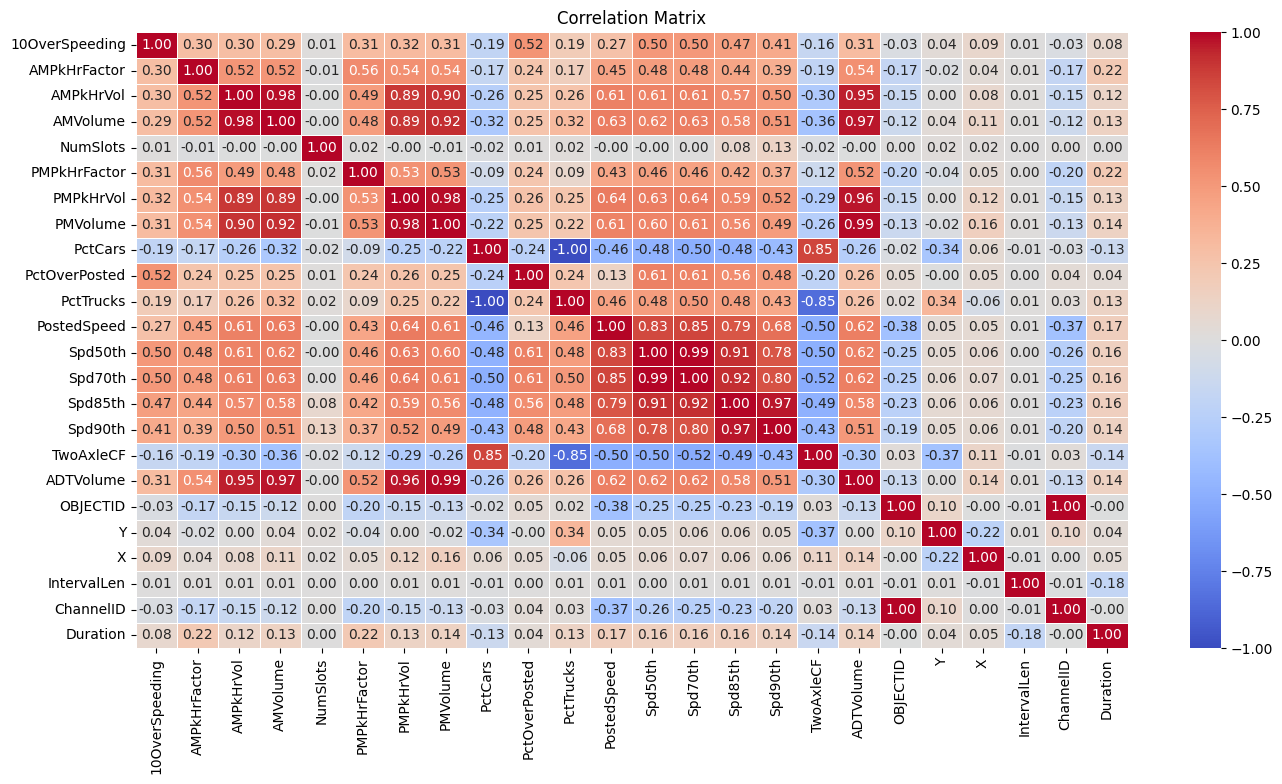

In [48]:
# Correlation for ALL NUMERICAL
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
# create subset
df_subset = df[['10OverSpeeding', 'AMPkHrVol', 'AMVolume', 'PMPkHrVol', 'PMVolume',
                     'PctCars', 'PostedSpeed', 'X', 'ADTVolume', 'Y', 'StartDay', 'Month']]

# Print the updated dataframe information
df_subset.info()
print('\n')
df_subset['10OverSpeeding'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 7055 entries, 2 to 22589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   10OverSpeeding  7055 non-null   int64  
 1   AMPkHrVol       7055 non-null   float64
 2   AMVolume        7055 non-null   float64
 3   PMPkHrVol       7055 non-null   float64
 4   PMVolume        7055 non-null   float64
 5   PctCars         7055 non-null   float64
 6   PostedSpeed     7055 non-null   float64
 7   X               7055 non-null   float64
 8   ADTVolume       7055 non-null   float64
 9   Y               7055 non-null   float64
 10  StartDay        7055 non-null   object 
 11  Month           7055 non-null   int32  
dtypes: float64(9), int32(1), int64(1), object(1)
memory usage: 689.0+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 7055 entries, 2 to 22589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  ----- 

10OverSpeeding
1    5658
0    1397
Name: count, dtype: int64

In [50]:
# set initial predictors list
target = '10OverSpeeding'
predictors = ['AMPkHrVol', 'AMVolume', 'PMPkHrVol', 'PMVolume',
                     'PctCars', 'PostedSpeed', 'X', 'ADTVolume', 'Y', 'StartDay', 'Month']

In [51]:
# get dummies
df_subset = pd.get_dummies(df_subset, columns=df_subset.select_dtypes(include=['object', 'category']).columns, drop_first=True)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7055 entries, 2 to 22589
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   10OverSpeeding  7055 non-null   int64  
 1   AMPkHrVol       7055 non-null   float64
 2   AMVolume        7055 non-null   float64
 3   PMPkHrVol       7055 non-null   float64
 4   PMVolume        7055 non-null   float64
 5   PctCars         7055 non-null   float64
 6   PostedSpeed     7055 non-null   float64
 7   X               7055 non-null   float64
 8   ADTVolume       7055 non-null   float64
 9   Y               7055 non-null   float64
 10  Month           7055 non-null   int32  
 11  StartDay_MON    7055 non-null   bool   
 12  StartDay_SAT    7055 non-null   bool   
 13  StartDay_SUN    7055 non-null   bool   
 14  StartDay_THU    7055 non-null   bool   
 15  StartDay_TUE    7055 non-null   bool   
 16  StartDay_WED    7055 non-null   bool   
dtypes: bool(6), float64(9), int32(1), int

In [52]:
# automated multivariate feature selection
X = df_subset.drop(columns=[target])
y = df_subset[target]

estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1).fit(X,y)

rnk = pd.DataFrame()
rnk['Feature'] = X.columns
rnk['Rank']= selector.ranking_
rnk.sort_values('Rank')

,Feature,Rank
0,AMPkHrVol,1
1,AMVolume,1
2,PMPkHrVol,1
3,PMVolume,1
4,PctCars,1
5,PostedSpeed,1
6,X,1
7,ADTVolume,1
8,Y,1
9,Month,1


In [53]:
# View the selected features
selected_features = rnk.sort_values('Rank').head(10)['Feature'].tolist()
# Display
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
['AMPkHrVol', 'AMVolume', 'PMPkHrVol', 'PMVolume', 'PctCars', 'PostedSpeed', 'X', 'ADTVolume', 'Y', 'Month']
Top 10 Selected Features:
['AMPkHrVol', 'AMVolume', 'PMPkHrVol', 'PMVolume', 'PctCars', 'PostedSpeed', 'X', 'ADTVolume', 'Y', 'Month']


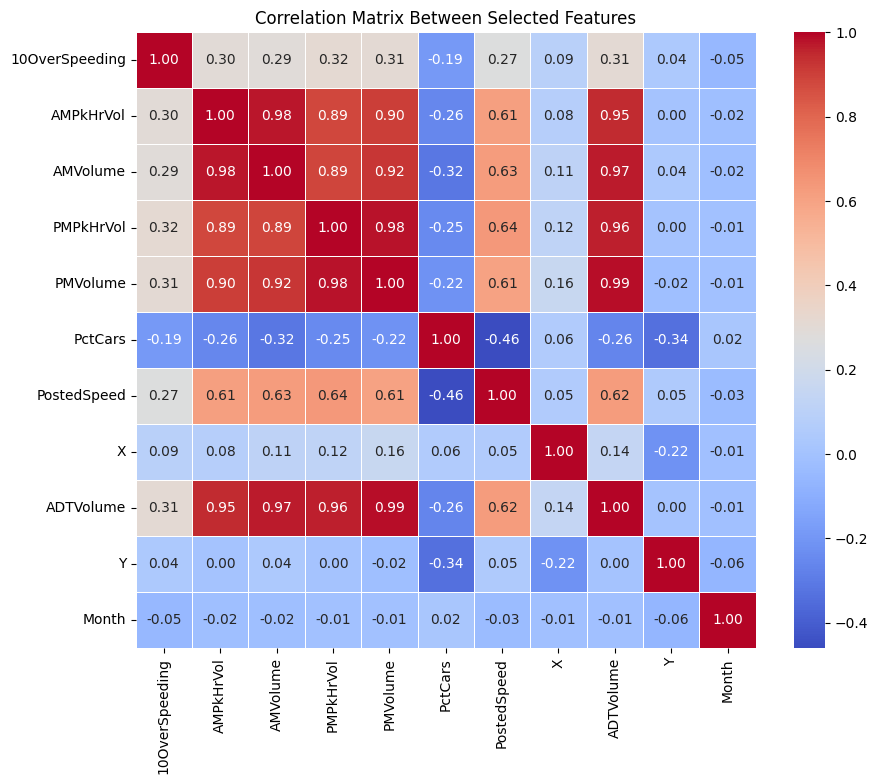

In [54]:
# Check correlation for selected features
correlation_matrix = df_subset[[target] + selected_features].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Between Selected Features')
plt.show()

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=17, stratify=y)

In [56]:
# determine hyperparameters
param_grid = {
    'max_depth': [10],
    'min_samples_leaf': [20],
    'max_features': list(range(2,11))
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=17),
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)

best_params = gridSearch.best_params_
print('Parameters: ', best_params)

Score:  0.8364648311127025
Parameters:  {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 20}
Score:  0.8364648311127025
Parameters:  {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 20}


### Model Building:
---



#### Decision Tree

In [57]:
# Train & Predict
tree_model = DecisionTreeClassifier(random_state=17,
                                   max_depth=best_params['max_depth'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=best_params['max_features'])
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [58]:
# Print decision tree rules
tree_rules = export_text(tree_model, feature_names=list(X_train.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- AMVolume <= 262.50
|   |--- X <= -13645958.50
|   |   |--- AMVolume <= 63.50
|   |   |   |--- PMVolume <= 74.50
|   |   |   |   |--- Y <= 5702417.00
|   |   |   |   |   |--- Y <= 5697200.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Y >  5697200.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Y >  5702417.00
|   |   |   |   |   |--- ADTVolume <= 90.50
|   |   |   |   |   |   |--- Month <= 5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Month >  5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ADTVolume >  90.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- PMVolume >  74.50
|   |   |   |   |--- Month <= 3.50
|   |   |   |   |   |--- PostedSpeed <= 22.50
|   |   |   |   |   |   |--- Y <= 5708024.75
|   |   |   |   |   |   |   |--- PMVolume <= 121.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PMVolume >  121.50
|   |   |   |   |   |  

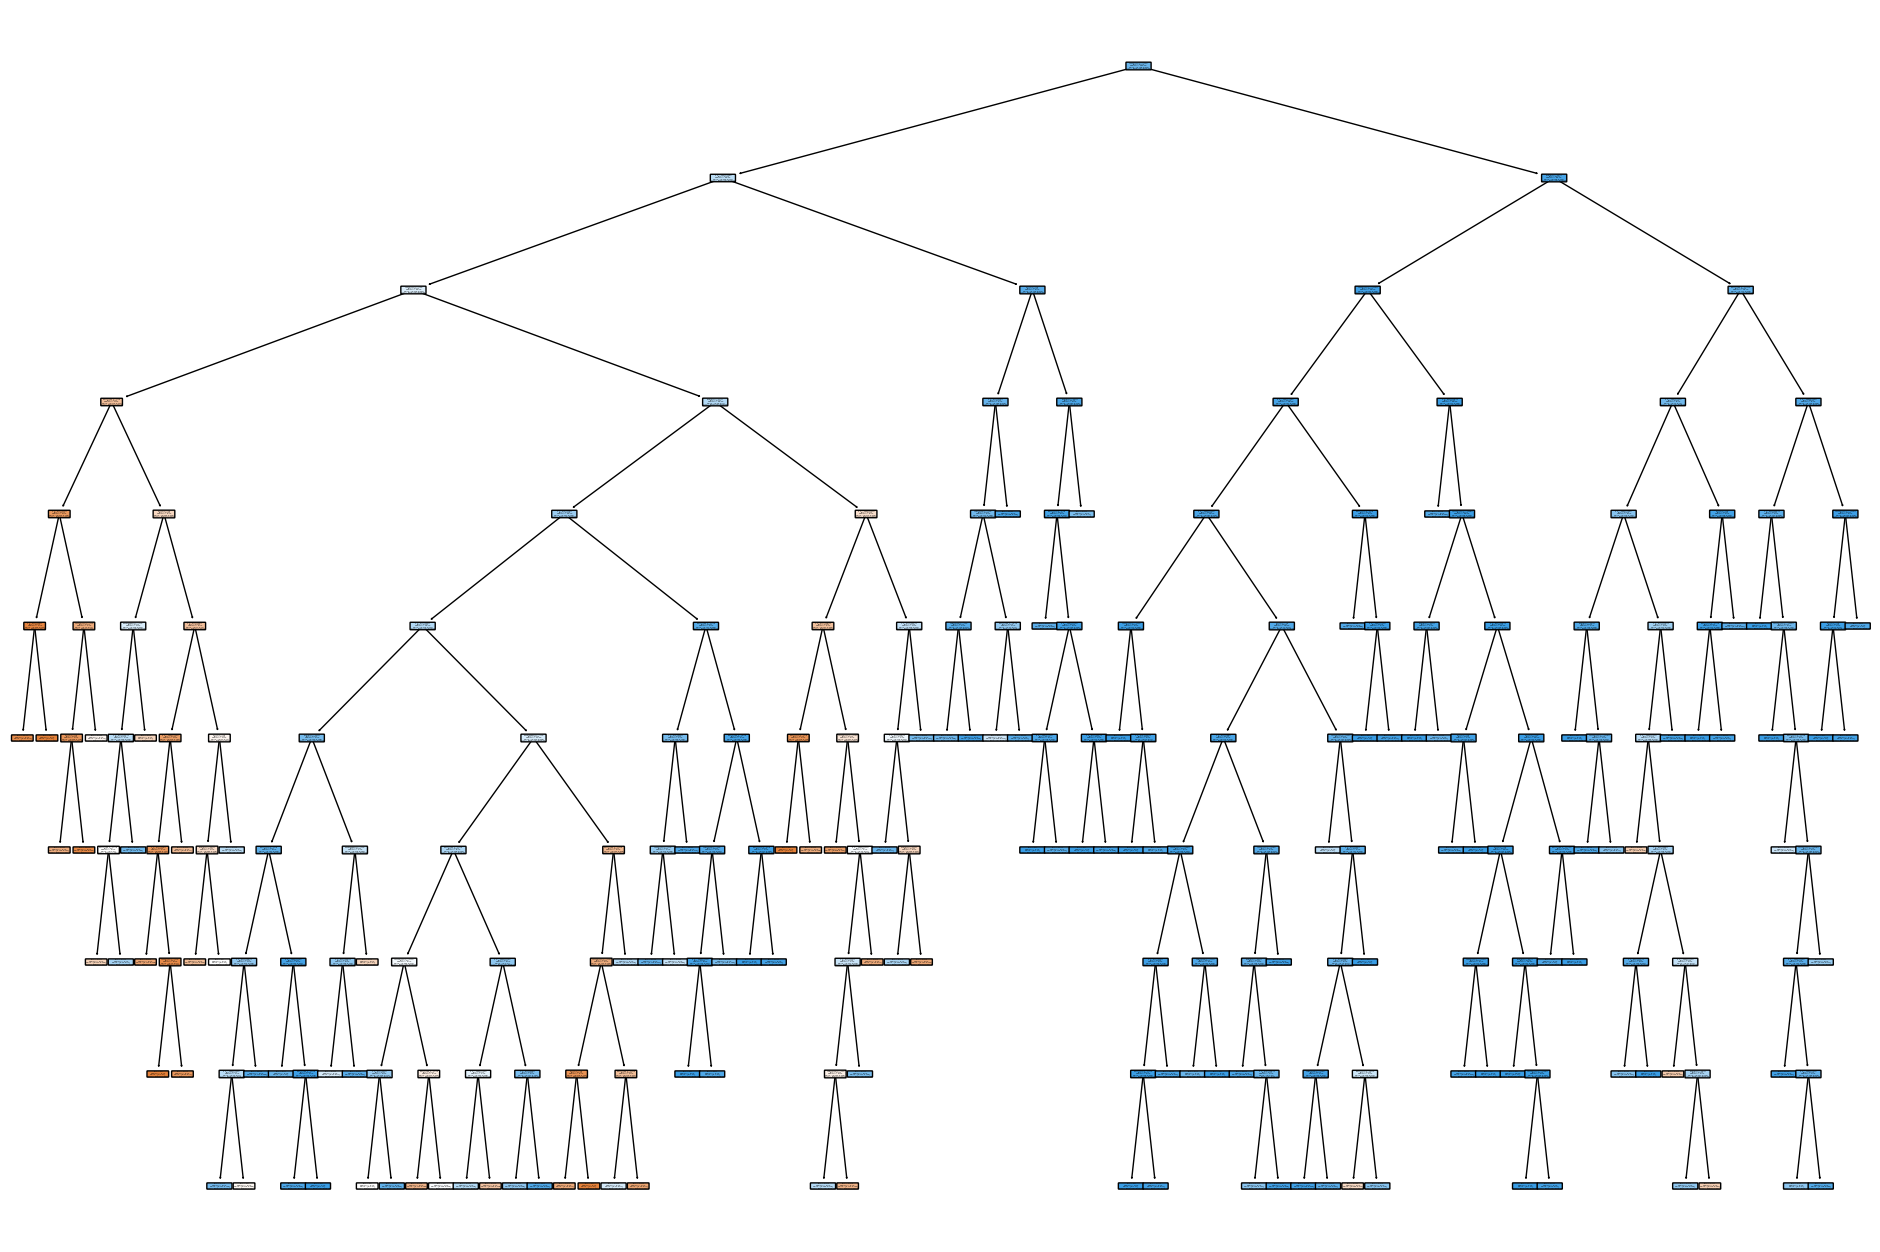

In [59]:
# Tree Rules Figure
plt.figure(figsize=(24, 16))
plot_tree(tree_model, feature_names=list(X_train.columns), class_names=['Over10Speeing', 'NoSpeedingOver10'], filled=True, rounded=True, proportion=True)
plt.show()


Training Performance:
Accuracy: 0.872
Precision: 0.899
Recall: 0.948


Training Performance:
Accuracy: 0.872
Precision: 0.899
Recall: 0.948


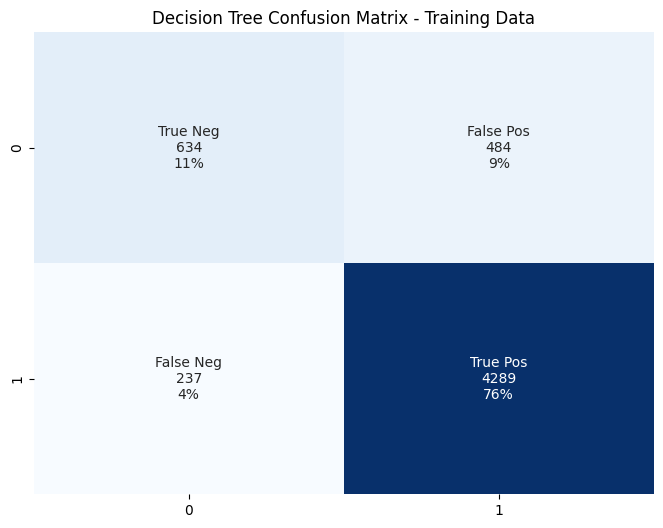


Testing Performance:
Accuracy: 0.826
Precision: 0.874
Recall: 0.916


Testing Performance:
Accuracy: 0.826
Precision: 0.874
Recall: 0.916


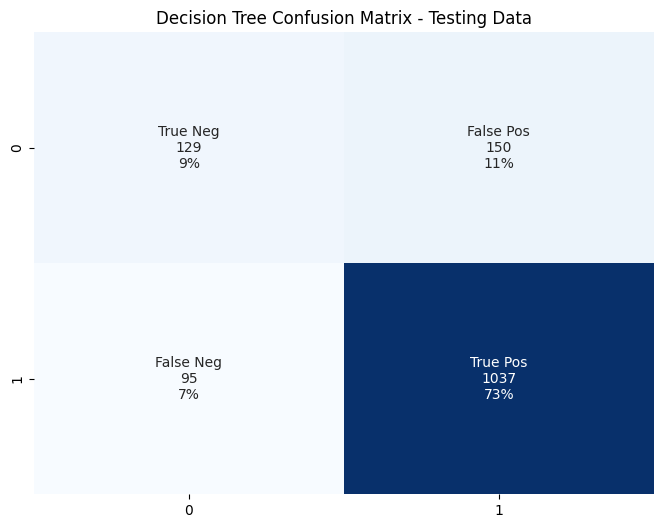

In [60]:
# Sets for iteration
datasets = [(X_train, y_train, "Training"), (X_test, y_test, "Testing")]

for data, labels, dataset_name in datasets:
    # Predictions
    tree_predictions = tree_model.predict(data)
    tree_conf_matrix = confusion_matrix(labels, tree_predictions)

    # Performance Metrics
    accuracy = round(accuracy_score(labels, tree_predictions), 3)
    precision = round(precision_score(labels, tree_predictions), 3)
    recall = round(recall_score(labels, tree_predictions), 3)

    print(f"\n{dataset_name} Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Confusion Matrix
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in tree_conf_matrix.flatten()]
    group_percentages = ["{0:.0%}".format(value) for value in tree_conf_matrix.flatten() / np.sum(tree_conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(tree_conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title(f'Decision Tree Confusion Matrix - {dataset_name} Data')
    plt.show()

In [61]:
# Identify the most important features
importances = tree_model.feature_importances_
top_features = np.argsort(importances)[::-1][:5] # Where 5 is the number of features you want to select

# Print the top features
print("Top Features:")
for feature_index in top_features:
    print(X_train.columns[feature_index])

# keep top features & scale the data
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train.iloc[:, top_features])
X_test_final = scaler.transform(X_test.iloc[:, top_features])

Top Features:
AMVolume
Y
X
PctCars
PMVolume
Top Features:
AMVolume
Y
X
PctCars
PMVolume


#### New top 5 predictors based on the decision tree, utilised for each model from here on

In [62]:
# Save the top features into a new predictor X
X_top_features = X.iloc[:, top_features]

# Split the data into training and testing sets using new predictors selected in decision tree
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=17, stratify=y)

#### Random Forest

In [63]:
# Train & Predict
rf_model = RandomForestRegressor(random_state=17)
rf_model.fit(X_train, y_train)
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

In [64]:
# Performance
print("Performance Metrics:\n")

# Training Set
print("Training Performance:")
print(f"MSE: {mean_squared_error(y_train, train_predictions)}")
print(f"R-squared: {r2_score(y_train, train_predictions)}")

# Testing Set
print("\nTesting Performance:")
print(f"MSE: {mean_squared_error(y_test, test_predictions)}")
print(f"R-squared: {r2_score(y_test, test_predictions)}")

Performance Metrics:

Training Performance:
MSE: 0.014233238837703754
R-squared: 0.9103972386141846

Testing Performance:
MSE: 0.11146888731396173
R-squared: 0.29732085628886595
Performance Metrics:

Training Performance:
MSE: 0.014233238837703754
R-squared: 0.9103972386141846

Testing Performance:
MSE: 0.11146888731396173
R-squared: 0.29732085628886595


#### Logistic Regression

In [65]:
# Train the model
logistic_model = LogisticRegression(random_state=17)
logistic_model.fit(X_train, y_train)
logistic_train_predictions = logistic_model.predict(X_train)
logistic_test_predictions = logistic_model.predict(X_test)

In [66]:
# Print Intercept
print(f"Y-Intercept Value: {logistic_model.intercept_[0]}")

# Print Coefficients
coefficients_df = pd.DataFrame({'Predictor': X_top_features.columns, 'Coefficient': logistic_model.coef_[0]})
print("\nCoefficients:")
print(coefficients_df)

Y-Intercept Value: 3.430078655417783e-09

Coefficients:
  Predictor  Coefficient
0  AMVolume     0.000619
1         Y     0.000033
2         X     0.000014
3   PctCars    -0.000060
4  PMVolume     0.000718
Y-Intercept Value: 3.430078655417783e-09

Coefficients:
  Predictor  Coefficient
0  AMVolume     0.000619
1         Y     0.000033
2         X     0.000014
3   PctCars    -0.000060
4  PMVolume     0.000718


Logistic Regression Performance Metrics:


Training Performance:
Accuracy: 0.802
Precision: 0.803
Recall: 0.998
Logistic Regression Performance Metrics:


Training Performance:
Accuracy: 0.802
Precision: 0.803
Recall: 0.998


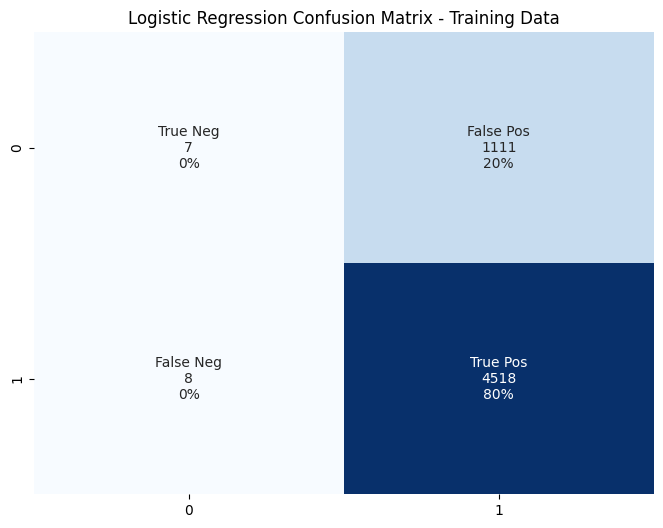


Testing Performance:
Accuracy: 0.802
Precision: 0.803
Recall: 0.997


Testing Performance:
Accuracy: 0.802
Precision: 0.803
Recall: 0.997


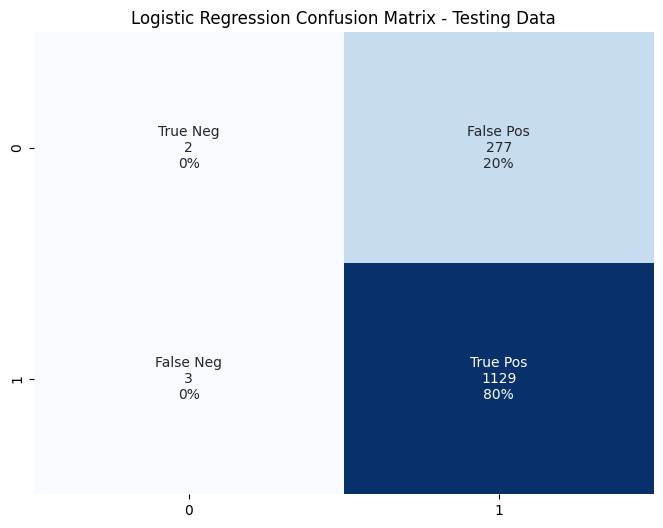

In [67]:
# LOGISTIC REGRESSION PERFORMANCE
print("Logistic Regression Performance Metrics:\n")

# Sets for iteration
datasets = [(X_train, y_train, "Training"), (X_test, y_test, "Testing")]

for data, labels, dataset_name in datasets:
    # Predictions
    logistic_predictions = logistic_model.predict(data)
    logistic_conf_matrix = confusion_matrix(labels, logistic_predictions)

    # Performance Metrics
    logistic_accuracy = round(accuracy_score(labels, logistic_predictions), 3)
    logistic_precision = round(precision_score(labels, logistic_predictions), 3)
    logistic_recall = round(recall_score(labels, logistic_predictions), 3)

    print(f"\n{dataset_name} Performance:")
    print(f"Accuracy: {logistic_accuracy}")
    print(f"Precision: {logistic_precision}")
    print(f"Recall: {logistic_recall}")

    # Confusion Matrix
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in logistic_conf_matrix.flatten()]
    group_percentages = ["{0:.0%}".format(value) for value in logistic_conf_matrix.flatten() / np.sum(logistic_conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(logistic_conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title(f'Logistic Regression Confusion Matrix - {dataset_name} Data')
    plt.show()

#### K-NN Classifier

In [68]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Predict
train_predictions = knn_classifier.predict(X_train_scaled)
test_predictions = knn_classifier.predict(X_test_scaled)

KNN Performance Metrics:


Training Performance:
Accuracy: 0.881
Precision: 0.91
Recall: 0.944
KNN Performance Metrics:


Training Performance:
Accuracy: 0.881
Precision: 0.91
Recall: 0.944


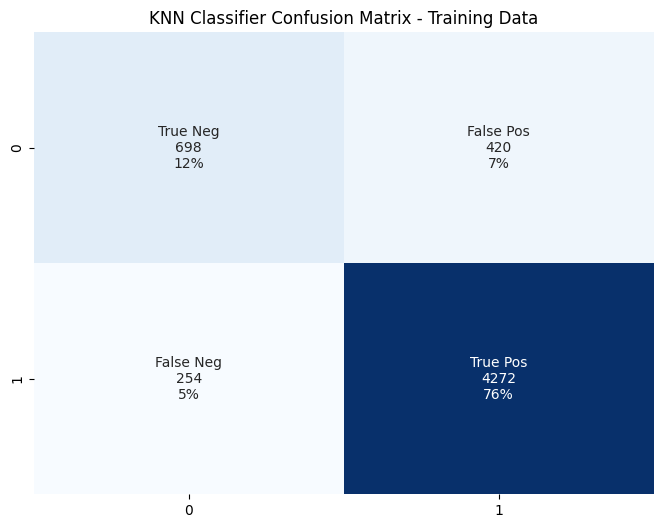


Testing Performance:
Accuracy: 0.811
Precision: 0.869
Recall: 0.9


Testing Performance:
Accuracy: 0.811
Precision: 0.869
Recall: 0.9


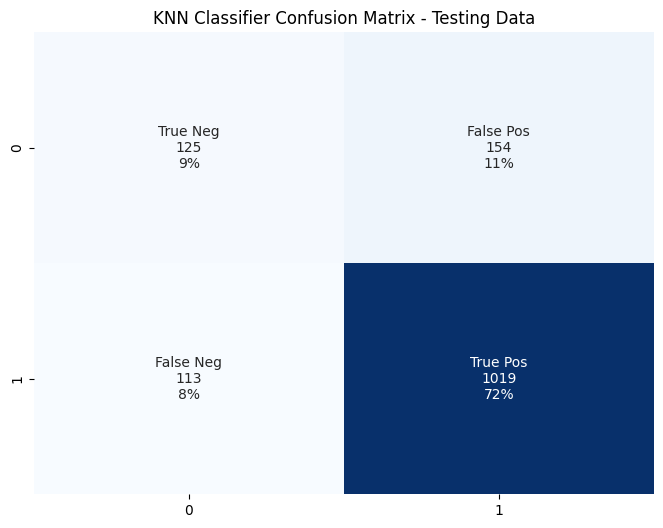

In [69]:
# KNN PERFORMANCE
print("KNN Performance Metrics:\n")

# Sets for iteration
datasets = [(X_train_scaled, y_train, "Training"), (X_test_scaled, y_test, "Testing")]

for data, labels, dataset_name in datasets:
    # Convert labels to integers
    labels = labels.astype(int)

    # Predictions
    knn_predictions = knn_classifier.predict(data)
    knn_conf_matrix = confusion_matrix(labels, knn_predictions)

    # Performance Metrics
    knn_accuracy = round(accuracy_score(labels, knn_predictions), 3)
    knn_precision = round(precision_score(labels, knn_predictions, average='binary'), 3)
    knn_recall = round(recall_score(labels, knn_predictions, average='binary'), 3)

    print(f"\n{dataset_name} Performance:")
    print(f"Accuracy: {knn_accuracy}")
    print(f"Precision: {knn_precision}")
    print(f"Recall: {knn_recall}")

    # Confusion Matrix
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in knn_conf_matrix.flatten()]
    group_percentages = ["{0:.0%}".format(value) for value in knn_conf_matrix.flatten() / np.sum(knn_conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(knn_conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title(f'KNN Classifier Confusion Matrix - {dataset_name} Data')
    plt.show()


#### All Models Comparison

In [70]:
# Initialize lists to store metrics
model_names = ["Decision Tree", "Logistic Regression", "KNN CLassifier"]
accuracy_list = []
precision_list = []
recall_list = []

In [71]:
# Append DT metrics to lists
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)

# Append Logistic metrics to lists
accuracy_list.append(logistic_accuracy)
precision_list.append(logistic_precision)
recall_list.append(logistic_recall)

# Append KNN metrics to lists
accuracy_list.append(knn_accuracy)
precision_list.append(knn_precision)
recall_list.append(knn_recall)

In [72]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "Accuracy", "Precision", "Recall"]
for model_name, accuracy, precision, recall in zip(model_names, accuracy_list, precision_list, recall_list):
    table.add_row([model_name, "Testing", accuracy, precision, recall])
print(table)

+---------------------+---------+----------+-----------+--------+
|        Model        | Dataset | Accuracy | Precision | Recall |
+---------------------+---------+----------+-----------+--------+
|    Decision Tree    | Testing |  0.826   |   0.874   | 0.916  |
| Logistic Regression | Testing |  0.802   |   0.803   | 0.997  |
|    KNN CLassifier   | Testing |  0.811   |   0.869   |  0.9   |
+---------------------+---------+----------+-----------+--------+
+---------------------+---------+----------+-----------+--------+
|        Model        | Dataset | Accuracy | Precision | Recall |
+---------------------+---------+----------+-----------+--------+
|    Decision Tree    | Testing |  0.826   |   0.874   | 0.916  |
| Logistic Regression | Testing |  0.802   |   0.803   | 0.997  |
|    KNN CLassifier   | Testing |  0.811   |   0.869   |  0.9   |
+---------------------+---------+----------+-----------+--------+


#### Stacked Ensemble

In [73]:
# set base models to stack
base_models = [
    ('decision_tree', RandomForestRegressor(random_state=17)),
    ('logistic_regression', LogisticRegression(random_state=17)),
    ('knn_classifier', KNeighborsClassifier(n_neighbors=5))
    ]

# define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# create & train the stacking ensemble
stacking_ensemble = StackingClassifier(estimators=base_models,
                                       final_estimator=meta_learner, cv=5)
stacking_ensemble.fit(X_train, y_train)

# make predictions and evaluate the ensemble model
stacked_predictions = stacking_ensemble.predict(X_test)
stacked_accuracy = round(accuracy_score(y_test, stacked_predictions), 3)
stacked_precision = round(precision_score(y_test, stacked_predictions), 3)
stacked_recall = round(recall_score(y_test, stacked_predictions), 3)

# print the results
print("Stacking Ensemble Performance:")
print(f"   Accuracy: {stacked_accuracy}")
print(f"   Precision: {stacked_precision}")
print(f"   Recall: {stacked_recall}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Stacking Ensemble Performance:
   Accuracy: 0.844
   Precision: 0.883
   Recall: 0.928
Stacking Ensemble Performance:
   Accuracy: 0.844
   Precision: 0.883
   Recall: 0.928


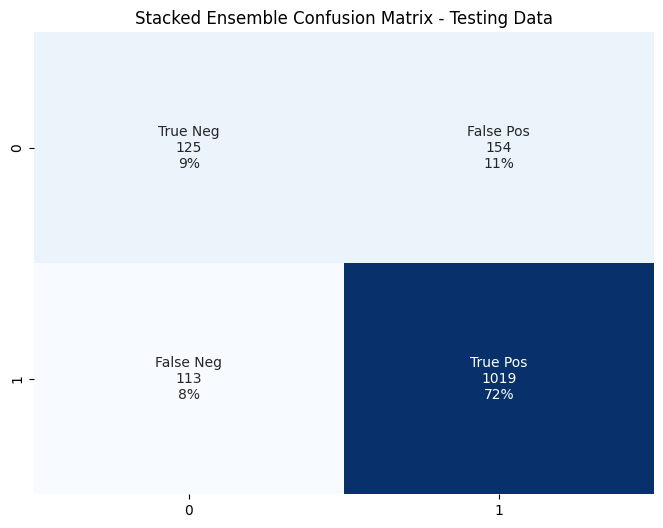

In [74]:
stacked_conf_matrix = confusion_matrix(y_test, stacked_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(stacked_conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title(f'Stacked Ensemble Confusion Matrix - Testing Data')
plt.show()